**It is a unsupervised machine learning algorithm that divides the unlabeled dataset into different clusters**

<hr>

**Step 1: Import Libraries**

<hr>

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<hr>

**Step 2: Uploading the dataset**

<hr>

In [28]:
df = pd.read_csv('/content/Cricket.csv', encoding = 'latin1')
df.head()

Player       Span  Mat  Inns  NO   Runs    HS    Ave  \
0         SR Tendulkar (INDIA)  1989-2012  463   452  41  18426  200*  44.83   
1  KC Sangakkara (Asia/ICC/SL)  2000-2015  404   380  41  14234   169  41.98   
2         RT Ponting (AUS/ICC)  1995-2012  375   365  39  13704   164  42.03   
3      ST Jayasuriya (Asia/SL)  1989-2011  445   433  18  13430   189  32.36   
4   DPMD Jayawardene (Asia/SL)  1998-2015  448   418  39  12650   144  33.37   

      BF     SR  100  50   0  
0  21367  86.23   49  96  20  
1  18048  78.86   25  93  15  
2  17046  80.39   30  82  20  
3  14725  91.20   28  68  34  
4  16020  78.96   19  77  28

Inference:

1. There is one probability of extract the start year nd end year from span column

<hr>

**Step 3: Data Inspection**

<hr>

In [29]:
# brief of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  79 non-null     object 
 1   Span    79 non-null     object 
 2   Mat     79 non-null     int64  
 3   Inns    79 non-null     int64  
 4   NO      79 non-null     int64  
 5   Runs    79 non-null     int64  
 6   HS      79 non-null     object 
 7   Ave     79 non-null     float64
 8   BF      79 non-null     int64  
 9   SR      79 non-null     float64
 10  100     79 non-null     int64  
 11  50      79 non-null     int64  
 12  0       79 non-null     int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 8.1+ KB


Insight:

1. Span is obj type so it should be int once we split


<hr>

1. describe means descriptive statistics

2. info means information of the entire dataset

describe give stats info and info gives general one like data type

<hr>

As observed span columns is an object columns, so inorder to convert the span into year of experience, we will firstly split it and then we will put the data into seperate columns

In [30]:
df[['Start', 'End']] = df.Span.str.split("-", expand = True)

In [31]:
df.head()

Player       Span  Mat  Inns  NO   Runs    HS    Ave  \
0         SR Tendulkar (INDIA)  1989-2012  463   452  41  18426  200*  44.83   
1  KC Sangakkara (Asia/ICC/SL)  2000-2015  404   380  41  14234   169  41.98   
2         RT Ponting (AUS/ICC)  1995-2012  375   365  39  13704   164  42.03   
3      ST Jayasuriya (Asia/SL)  1989-2011  445   433  18  13430   189  32.36   
4   DPMD Jayawardene (Asia/SL)  1998-2015  448   418  39  12650   144  33.37   

      BF     SR  100  50   0 Start   End  
0  21367  86.23   49  96  20  1989  2012  
1  18048  78.86   25  93  15  2000  2015  
2  17046  80.39   30  82  20  1995  2012  
3  14725  91.20   28  68  34  1989  2011  
4  16020  78.96   19  77  28  1998  2015

In [32]:
df['Start'].dtype

dtype('O')

In [33]:
# convert ino integer and then we will find the years of experience
# YOE = EndYear - FirstYear
df[['Start', 'End']] = df[['Start', 'End']].astype(int) # conversion
df['Experience'] = df['End'] - df['Start'] # Grab the number of YOE
df = df.drop(['Start', 'End', 'Span'], axis = 1)

In [34]:
df.head()

Player  Mat  Inns  NO   Runs    HS    Ave     BF  \
0         SR Tendulkar (INDIA)  463   452  41  18426  200*  44.83  21367   
1  KC Sangakkara (Asia/ICC/SL)  404   380  41  14234   169  41.98  18048   
2         RT Ponting (AUS/ICC)  375   365  39  13704   164  42.03  17046   
3      ST Jayasuriya (Asia/SL)  445   433  18  13430   189  32.36  14725   
4   DPMD Jayawardene (Asia/SL)  448   418  39  12650   144  33.37  16020   

      SR  100  50   0  Experience  
0  86.23   49  96  20          23  
1  78.86   25  93  15          15  
2  80.39   30  82  20          17  
3  91.20   28  68  34          22  
4  78.96   19  77  28          17

In [35]:
df['Experience'].value_counts()

11    10
17     9
15     8
16     8
14     8
10     8
12     7
13     7
8      4
18     3
19     2
9      2
23     1
22     1
21     1
Name: Experience, dtype: int64

Inference:
1. Most of the players are having experience between the 10 -17 year

In [36]:
df2 = df["HS"]

In [37]:
df2.to_string()

'0     200*\n1      169\n2      164\n3      189\n4      144\n5     137*\n6      139\n7      183\n8      153\n9      169\n10    161*\n11    141*\n12     172\n13    183*\n14    153*\n15    162*\n16     145\n17     215\n18     194\n19     150\n20     150\n21    152*\n22    132*\n23     173\n24     219\n25     183\n26     175\n27     124\n28    134*\n29     130\n30    120*\n31    131*\n32    119*\n33     144\n34     159\n35     102\n36    145*\n37     141\n38    108*\n39    188*\n40     145\n41     143\n42    189*\n43    142*\n44    139*\n45    127*\n46    131*\n47     122\n48    174*\n49    181*\n50     166\n51     145\n52     122\n53     121\n54    140*\n55    119*\n56    120*\n57    124*\n58    113*\n59    185*\n60     154\n61    116*\n62     112\n63    237*\n64    109*\n65     264\n66     141\n67     119\n68    144*\n69    145*\n70    150*\n71    131*\n72    133*\n73    119*\n74    133*\n75     96*\n76    120*\n77     156\n78     112'

In [38]:
df[['HS', 'extra']] = df.HS.str.split('*', expand  = True)

In [39]:
df.head()

Player  Mat  Inns  NO   Runs   HS    Ave     BF  \
0         SR Tendulkar (INDIA)  463   452  41  18426  200  44.83  21367   
1  KC Sangakkara (Asia/ICC/SL)  404   380  41  14234  169  41.98  18048   
2         RT Ponting (AUS/ICC)  375   365  39  13704  164  42.03  17046   
3      ST Jayasuriya (Asia/SL)  445   433  18  13430  189  32.36  14725   
4   DPMD Jayawardene (Asia/SL)  448   418  39  12650  144  33.37  16020   

      SR  100  50   0  Experience extra  
0  86.23   49  96  20          23        
1  78.86   25  93  15          15  None  
2  80.39   30  82  20          17  None  
3  91.20   28  68  34          22  None  
4  78.96   19  77  28          17  None

In [41]:
df['HS'] = df['HS'].astype(int)

In [42]:
df.HS.dtypes

dtype('int64')

In [43]:
df = df.drop(['extra'], axis = 1)

In [44]:
df.head()

Player  Mat  Inns  NO   Runs   HS    Ave     BF  \
0         SR Tendulkar (INDIA)  463   452  41  18426  200  44.83  21367   
1  KC Sangakkara (Asia/ICC/SL)  404   380  41  14234  169  41.98  18048   
2         RT Ponting (AUS/ICC)  375   365  39  13704  164  42.03  17046   
3      ST Jayasuriya (Asia/SL)  445   433  18  13430  189  32.36  14725   
4   DPMD Jayawardene (Asia/SL)  448   418  39  12650  144  33.37  16020   

      SR  100  50   0  Experience  
0  86.23   49  96  20          23  
1  78.86   25  93  15          15  
2  80.39   30  82  20          17  
3  91.20   28  68  34          22  
4  78.96   19  77  28          17

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Player      79 non-null     object 
 1   Mat         79 non-null     int64  
 2   Inns        79 non-null     int64  
 3   NO          79 non-null     int64  
 4   Runs        79 non-null     int64  
 5   HS          79 non-null     int64  
 6   Ave         79 non-null     float64
 7   BF          79 non-null     int64  
 8   SR          79 non-null     float64
 9   100         79 non-null     int64  
 10  50          79 non-null     int64  
 11  0           79 non-null     int64  
 12  Experience  79 non-null     int64  
dtypes: float64(2), int64(10), object(1)
memory usage: 8.1+ KB


<hr>

**Step 5: EDA**

<hr>

In [46]:
# Data management and cleaning

In [47]:
df.isnull().sum()

Player        0
Mat           0
Inns          0
NO            0
Runs          0
HS            0
Ave           0
BF            0
SR            0
100           0
50            0
0             0
Experience    0
dtype: int64

In [48]:
df.shape

(79, 13)

In [50]:
#duplicates
df[df.duplicated()].sum()

Player        0.0
Mat           0.0
Inns          0.0
NO            0.0
Runs          0.0
HS            0.0
Ave           0.0
BF            0.0
SR            0.0
100           0.0
50            0.0
0             0.0
Experience    0.0
dtype: float64

The data is free from NaN values and duplicated values. There is no need for replacement or droppping of the data

<hr>

**Step 6: Visualization**

<hr>

Visualize

1. The player vs matches

2. Top 10 players wrt to matches

3. Compare all the players on all columns

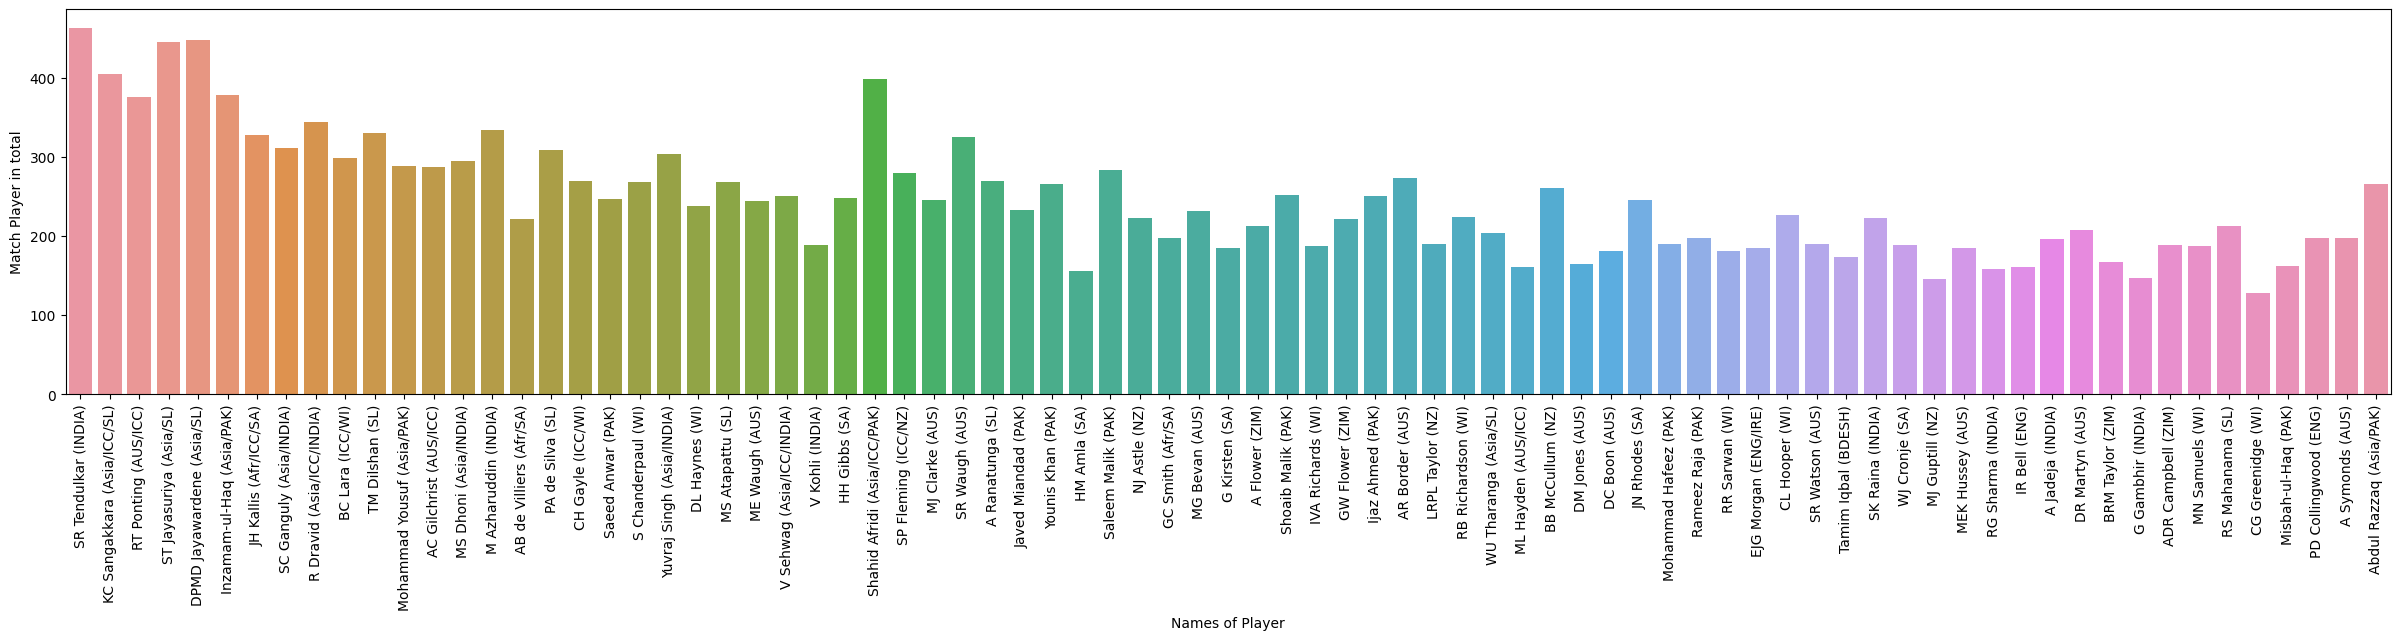

In [56]:
# 1. Players vs Match
plt.figure(figsize = (30, 5)) # size of the canvas / image
mat = df[['Player', 'Mat']] # dataframe = mat that stores the values of players and matches being played by them
ax = sns.barplot(x = 'Player', y = "Mat", data = mat) # using seaborn, we are plotting the data
ax.set(xlabel = "Names of Player", ylabel='Match Player in total') # setting the values for axes
plt.xticks(rotation = 90) # rotating the names wrt to 90
plt.show() # showing the canvas

Insight:

1. SRT is the player with the most number matches

2. Greenridge is the player is least number of matches

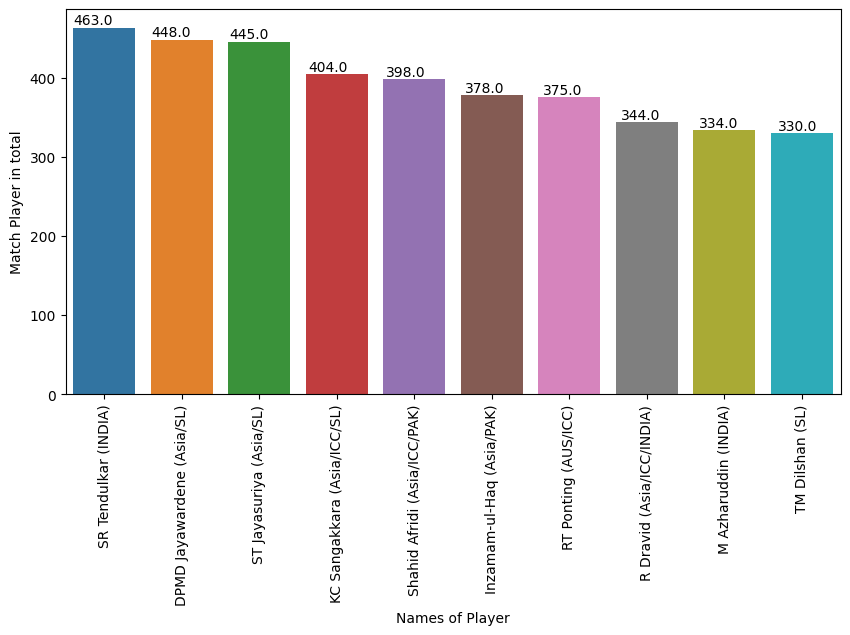

In [63]:
# 2. Top 10 players
plt.figure(figsize = (10, 5))
mat_top10 = df[['Player', 'Mat']].sort_values('Mat', ascending = False).head(10)
ax = sns.barplot(x = 'Player', y = "Mat", data = mat_top10)# using seaborn, we are plotting the data
for i in ax.patches:
  ax.annotate(str(i.get_height()), (i.get_x()*1.01, i.get_height()*1.01)) #optional
ax.set(xlabel = "Names of Player", ylabel='Match Player in total') # setting the values for axes
plt.xticks(rotation = 90) # rotating the names wrt to 90
plt.show() # showing the canvas

We will plot each player on each colums

In [68]:
col_List = df.columns

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Player      79 non-null     object 
 1   Mat         79 non-null     int64  
 2   Inns        79 non-null     int64  
 3   NO          79 non-null     int64  
 4   Runs        79 non-null     int64  
 5   HS          79 non-null     int64  
 6   Ave         79 non-null     float64
 7   BF          79 non-null     int64  
 8   SR          79 non-null     float64
 9   100         79 non-null     int64  
 10  50          79 non-null     int64  
 11  0           79 non-null     int64  
 12  Experience  79 non-null     int64  
dtypes: float64(2), int64(10), object(1)
memory usage: 8.1+ KB


In [71]:
col_List

Index(['Player', 'Mat', 'Inns', 'NO', 'Runs', 'HS', 'Ave', 'BF', 'SR', '100',
       '50', '0', 'Experience'],
      dtype='object')

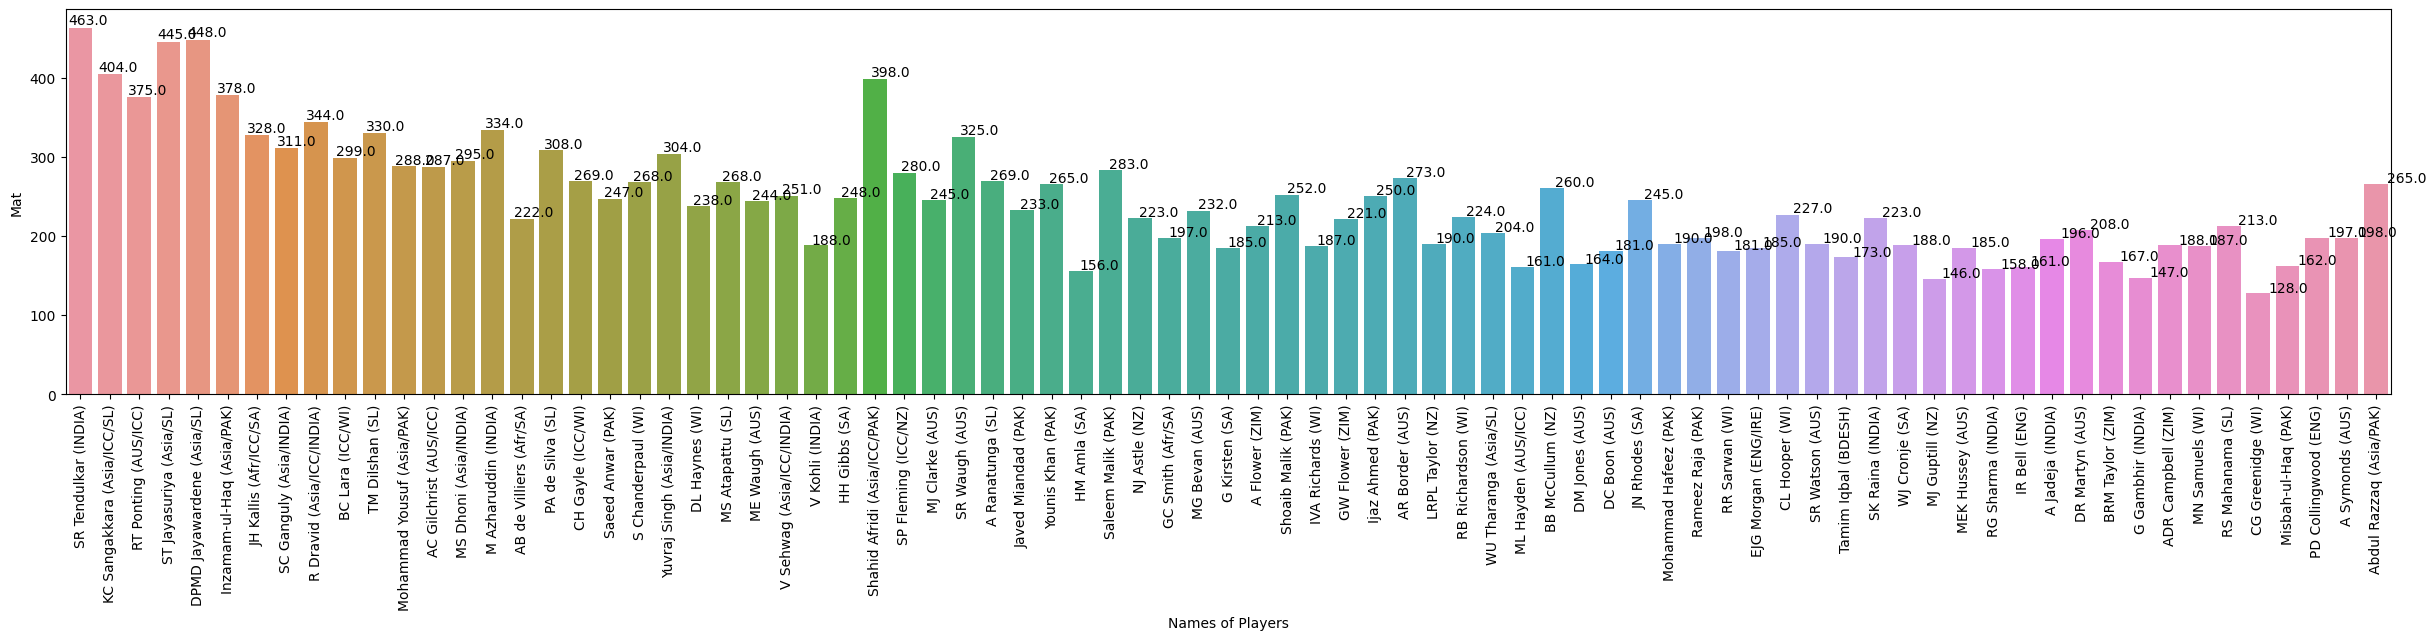

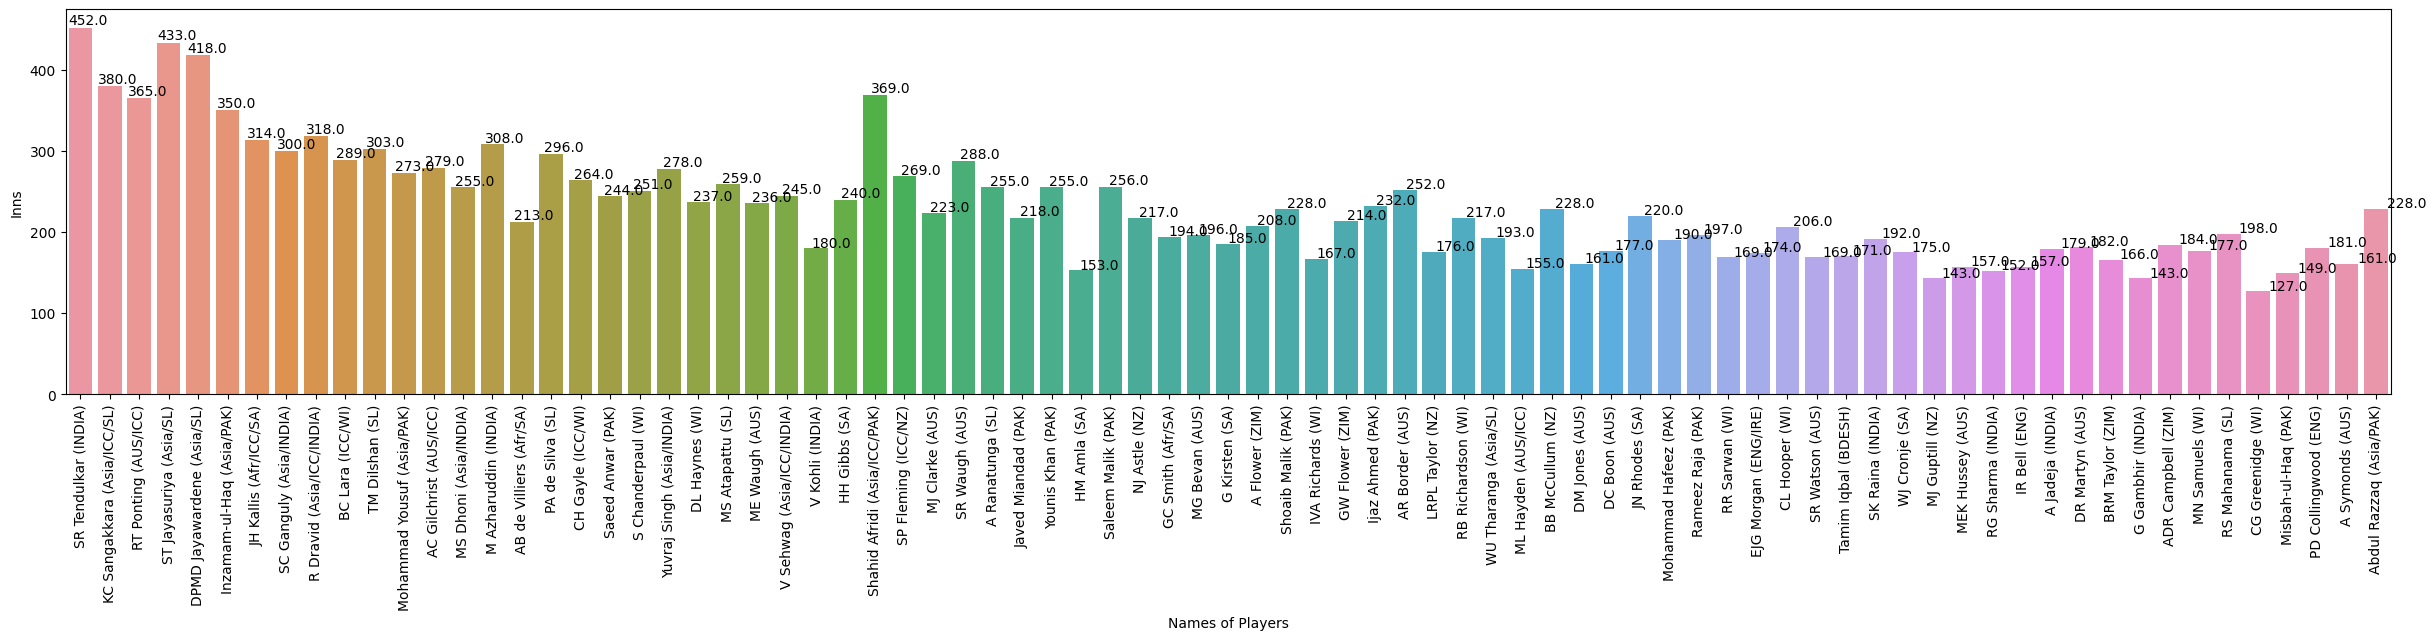

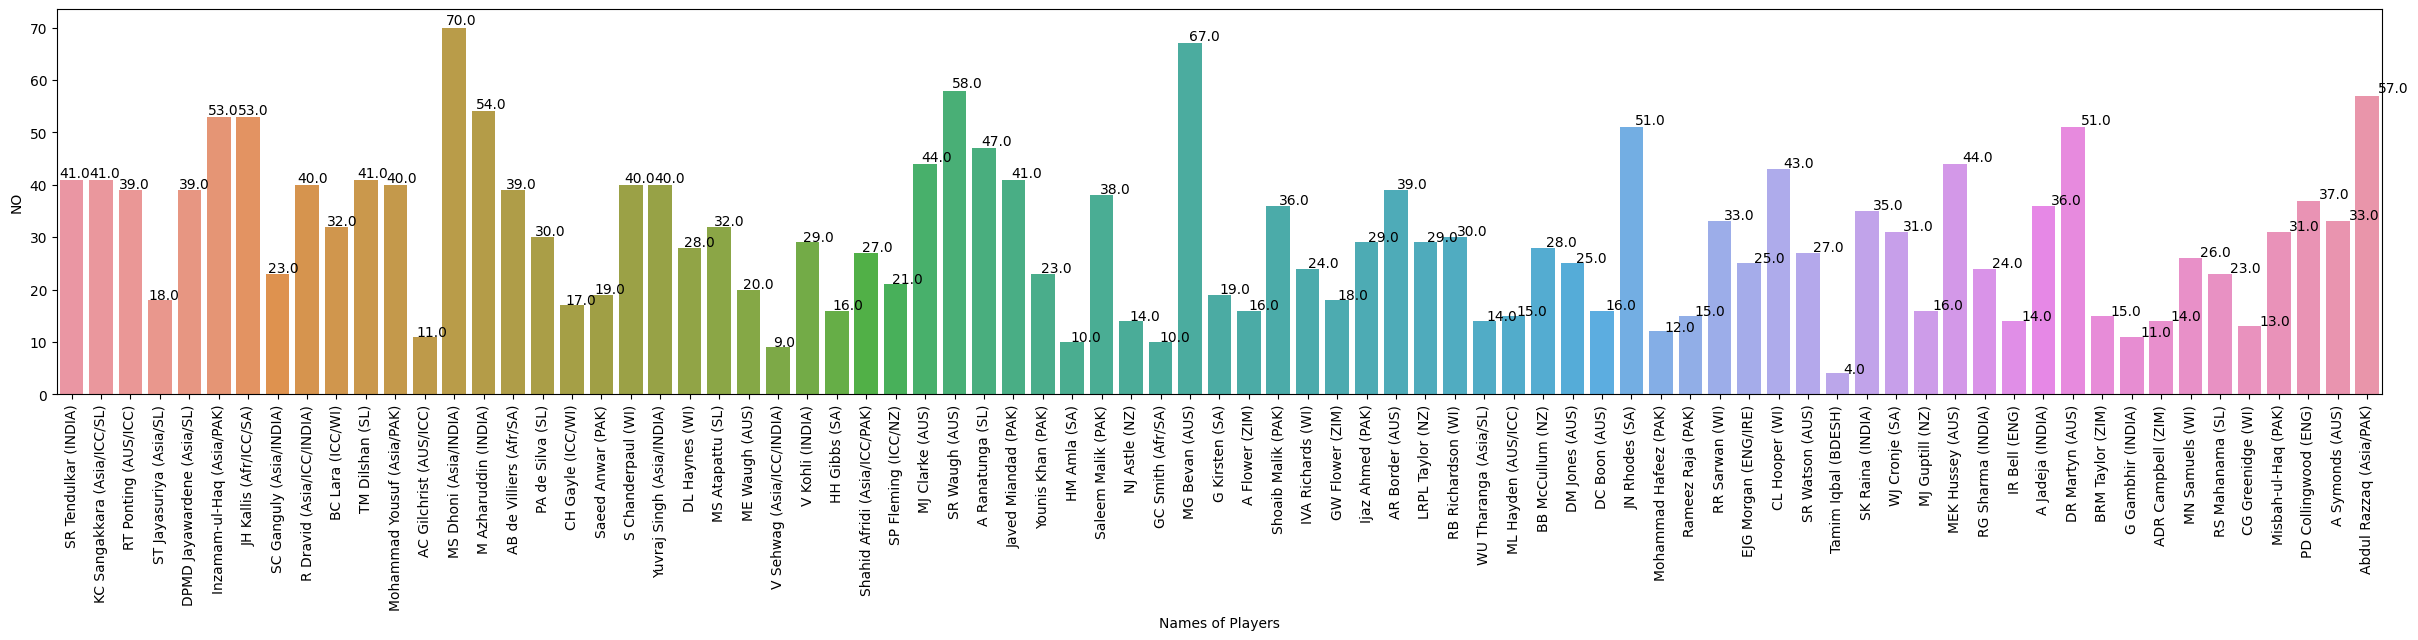

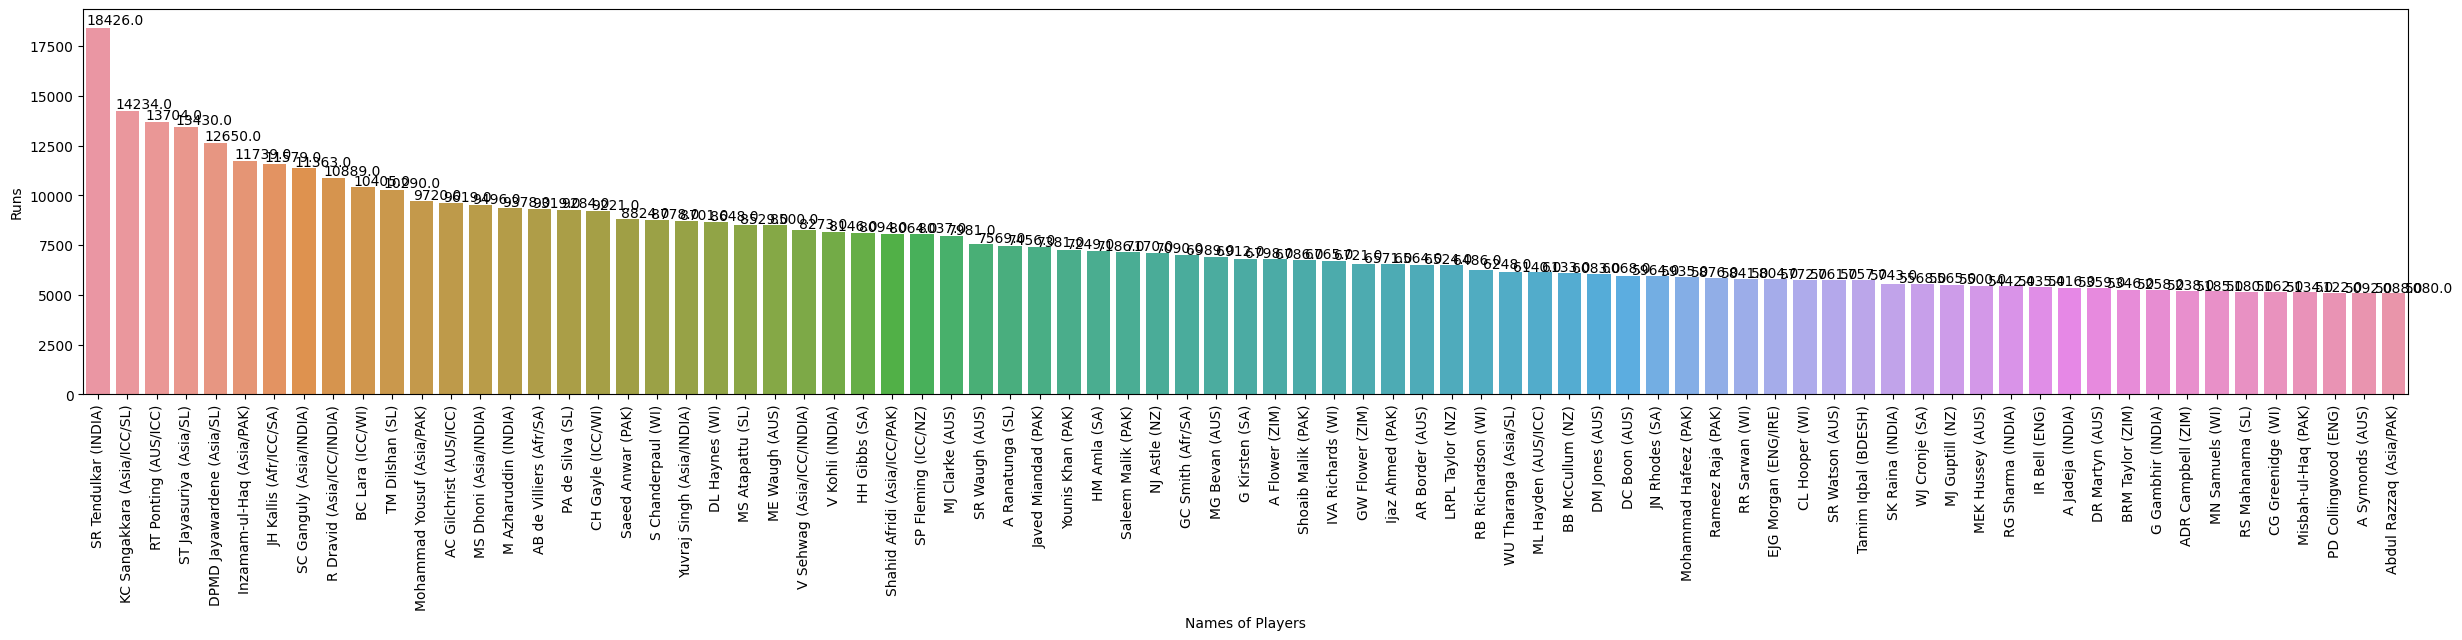

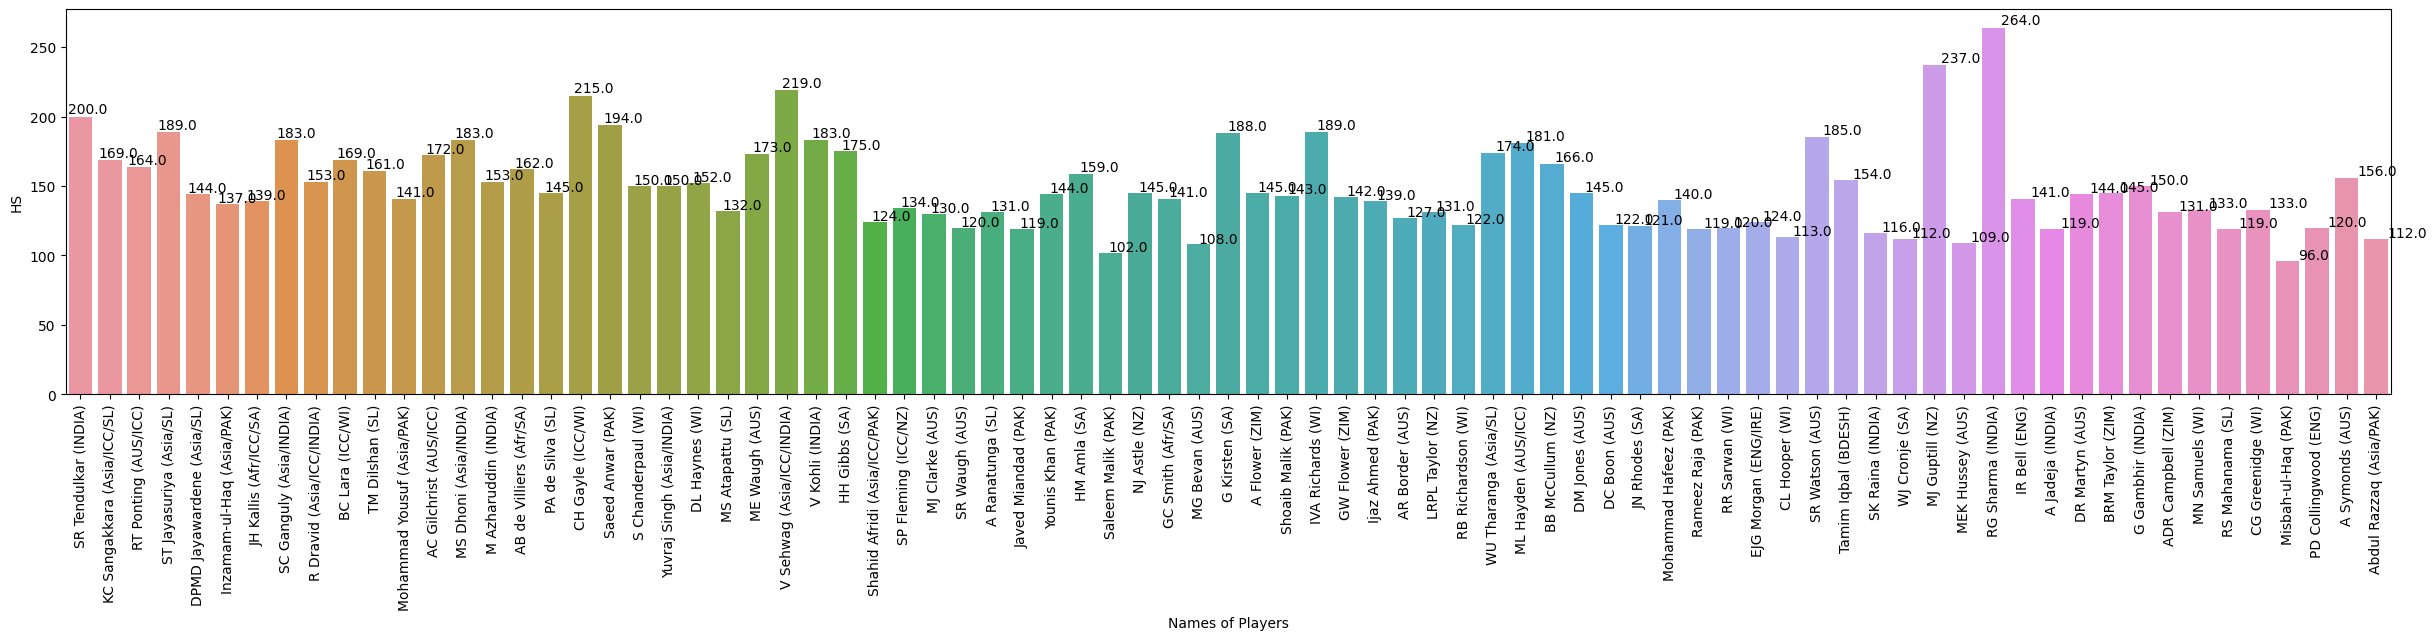

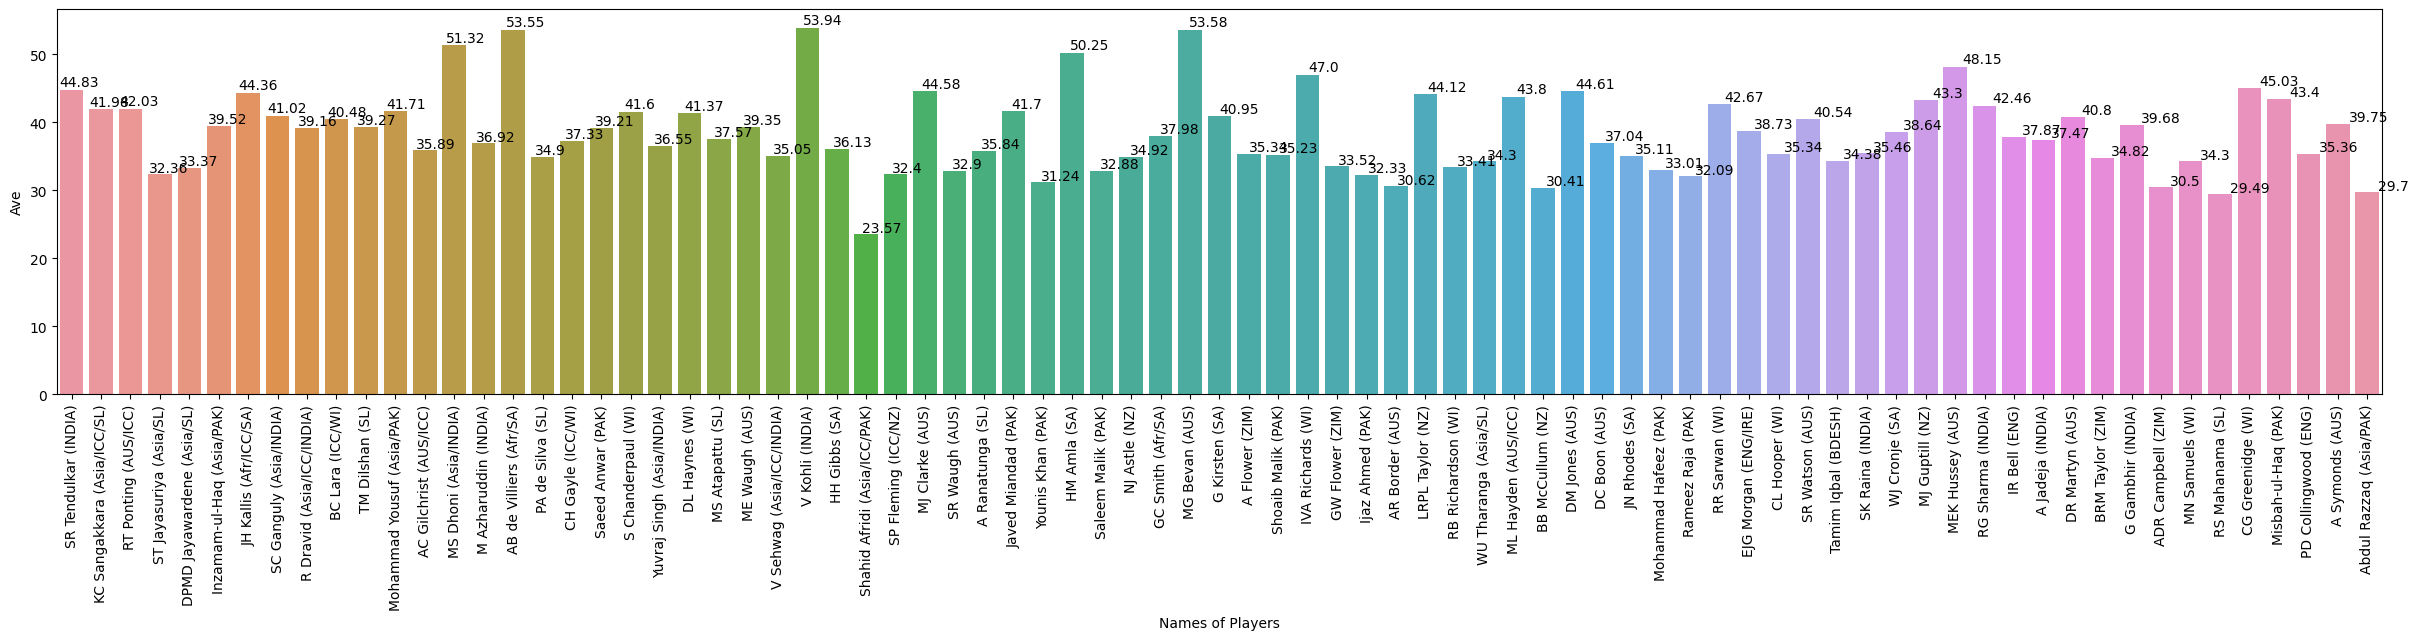

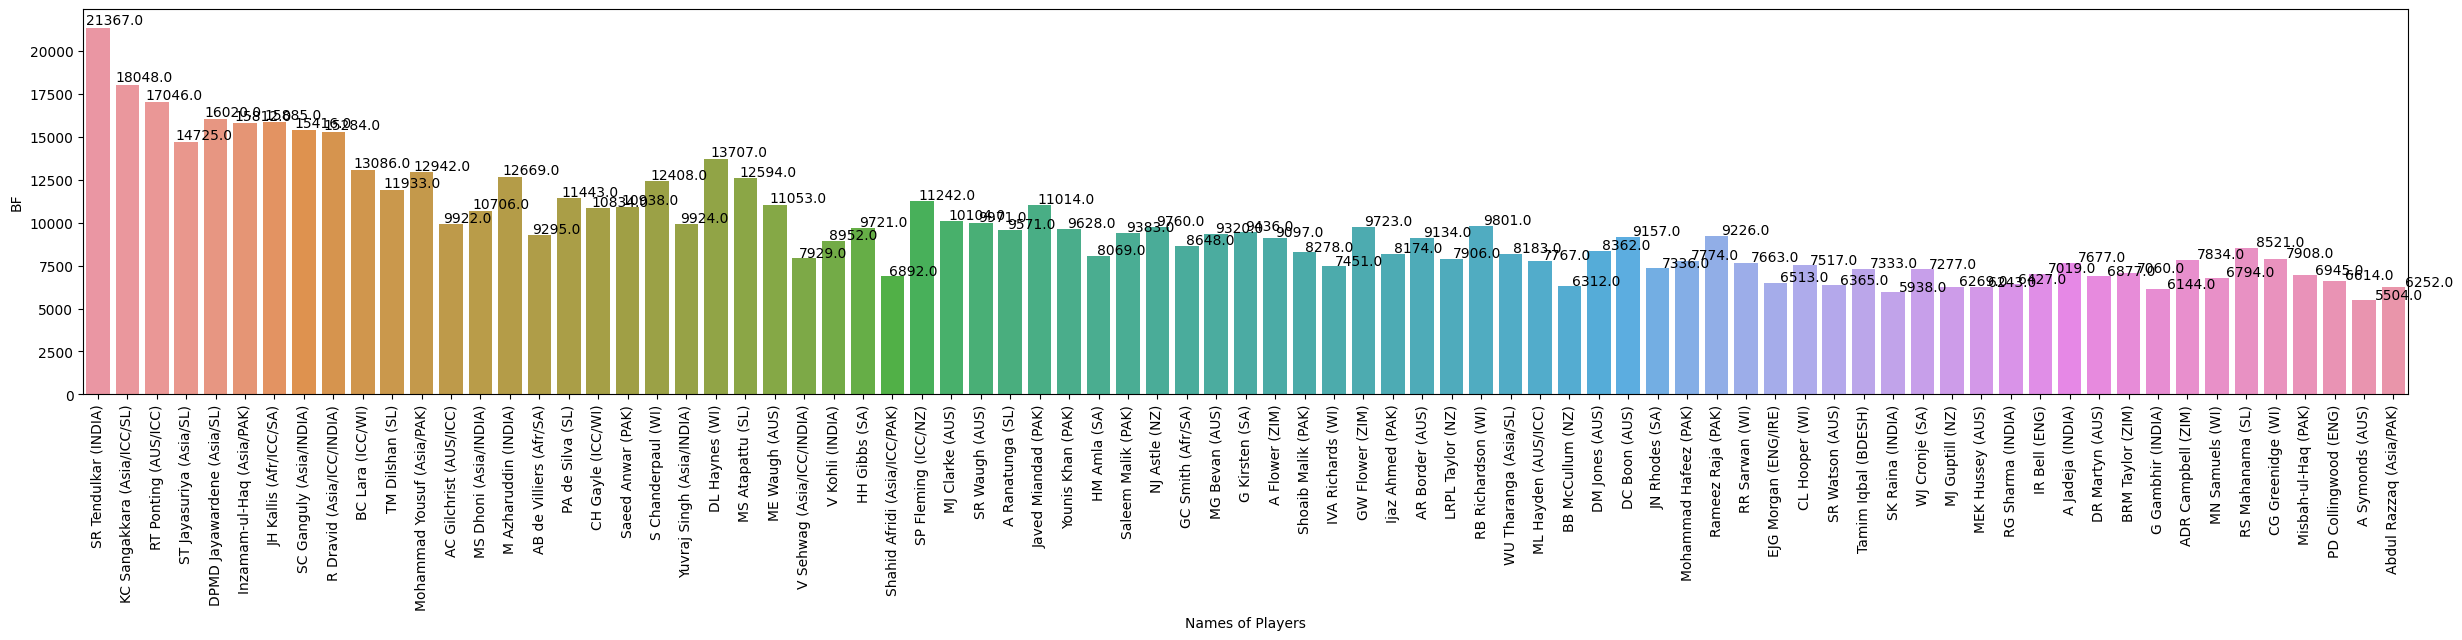

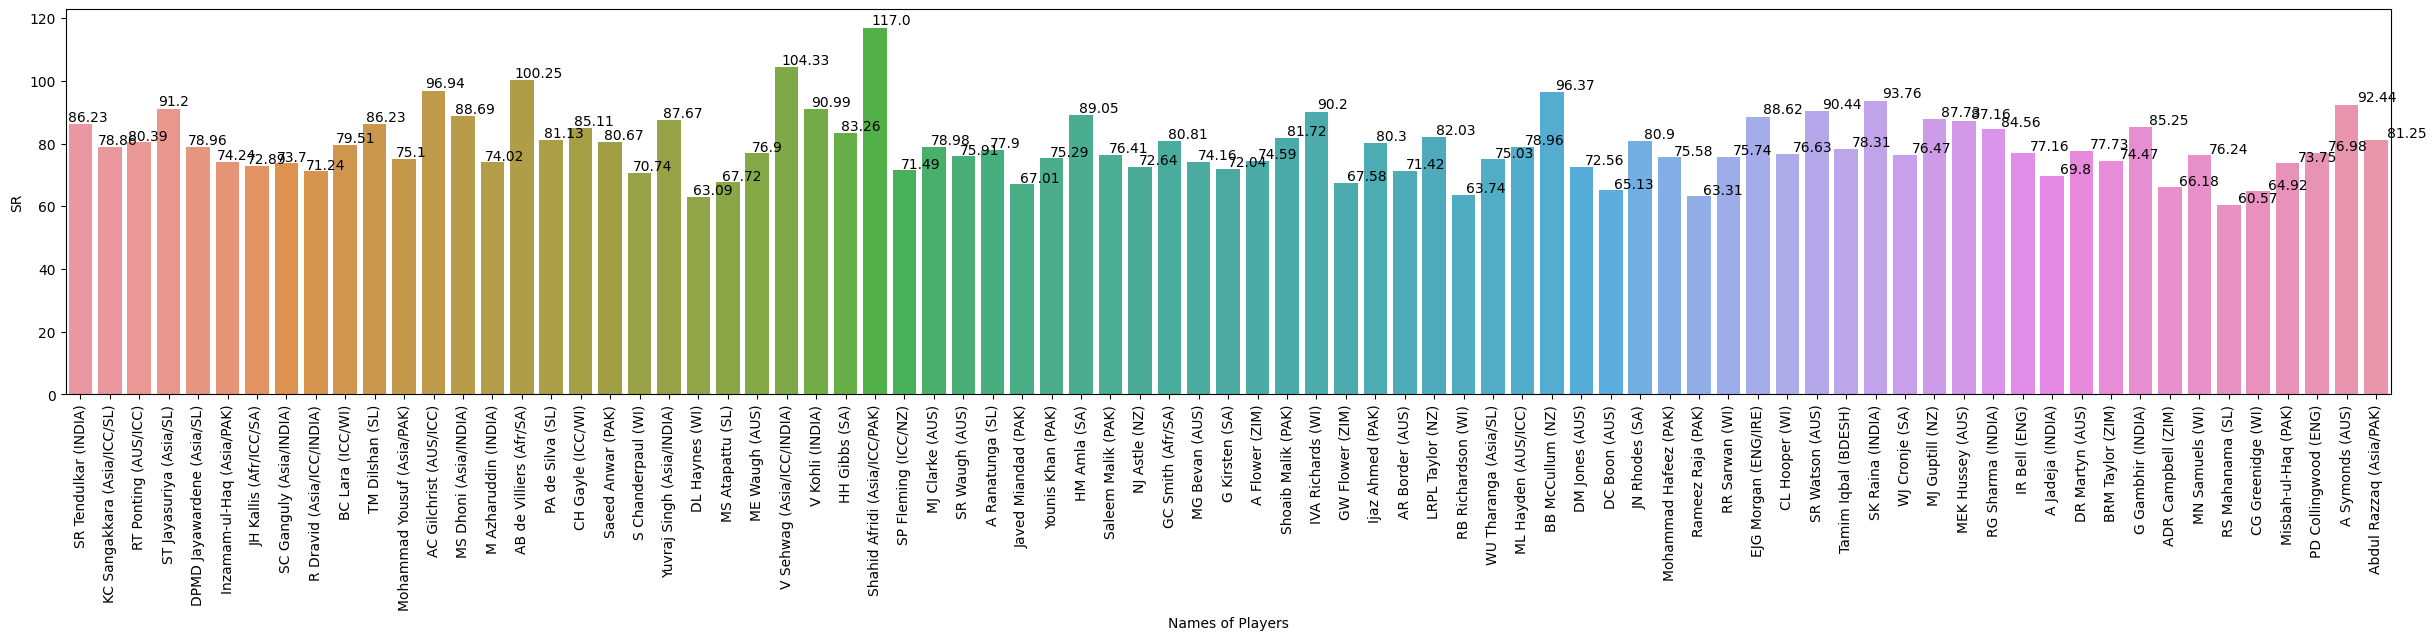

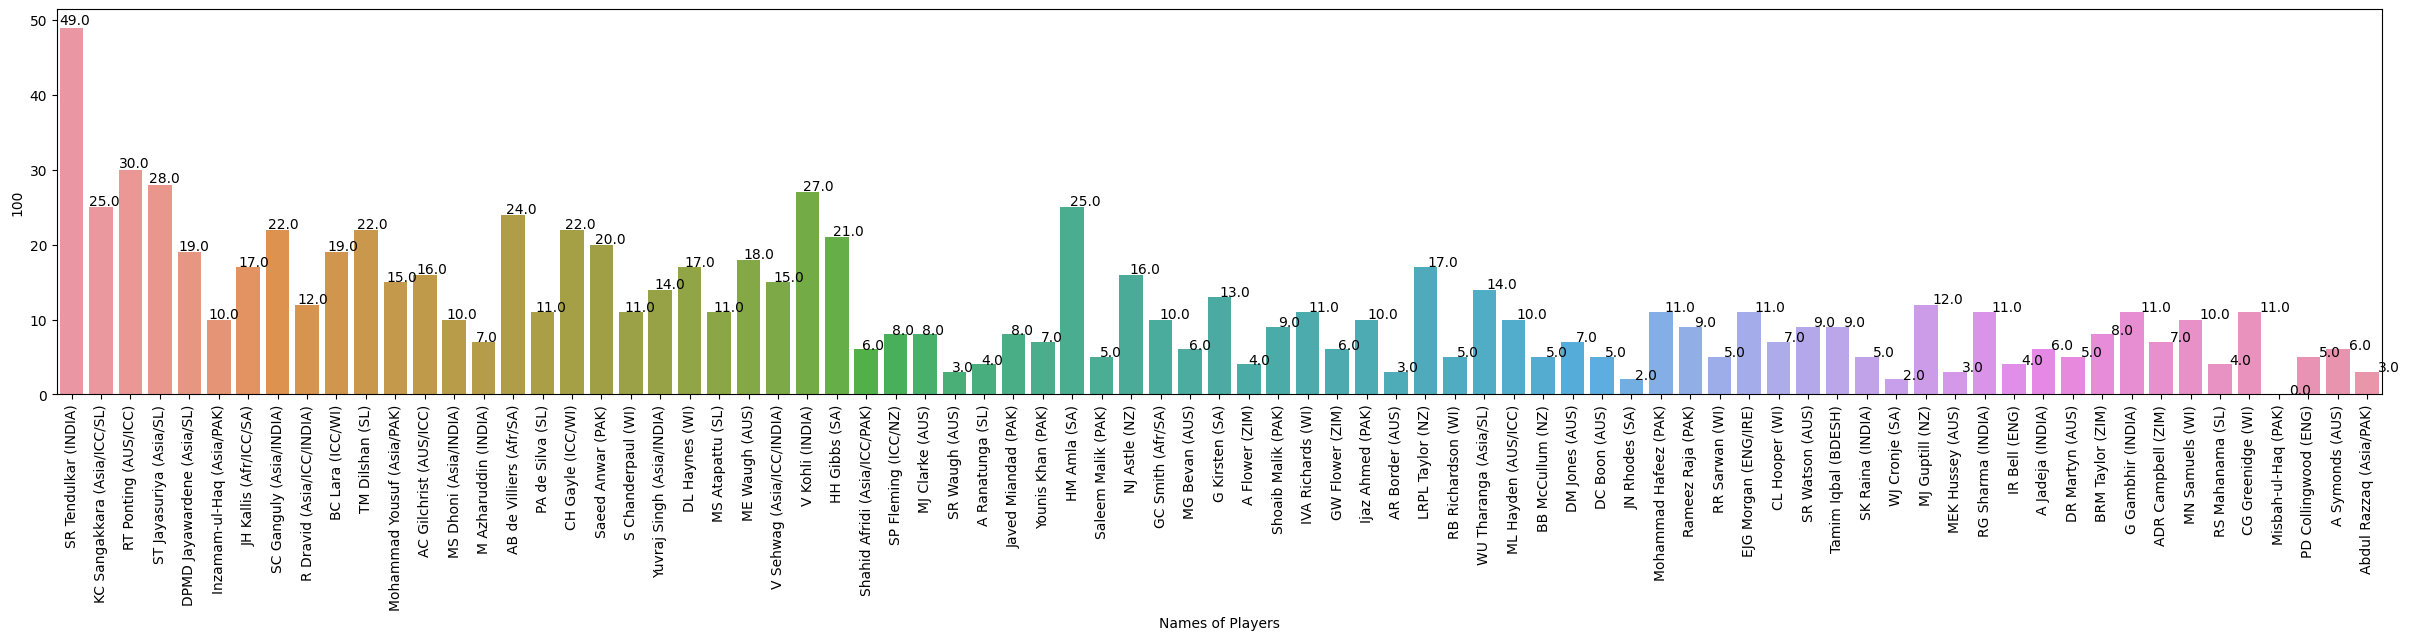

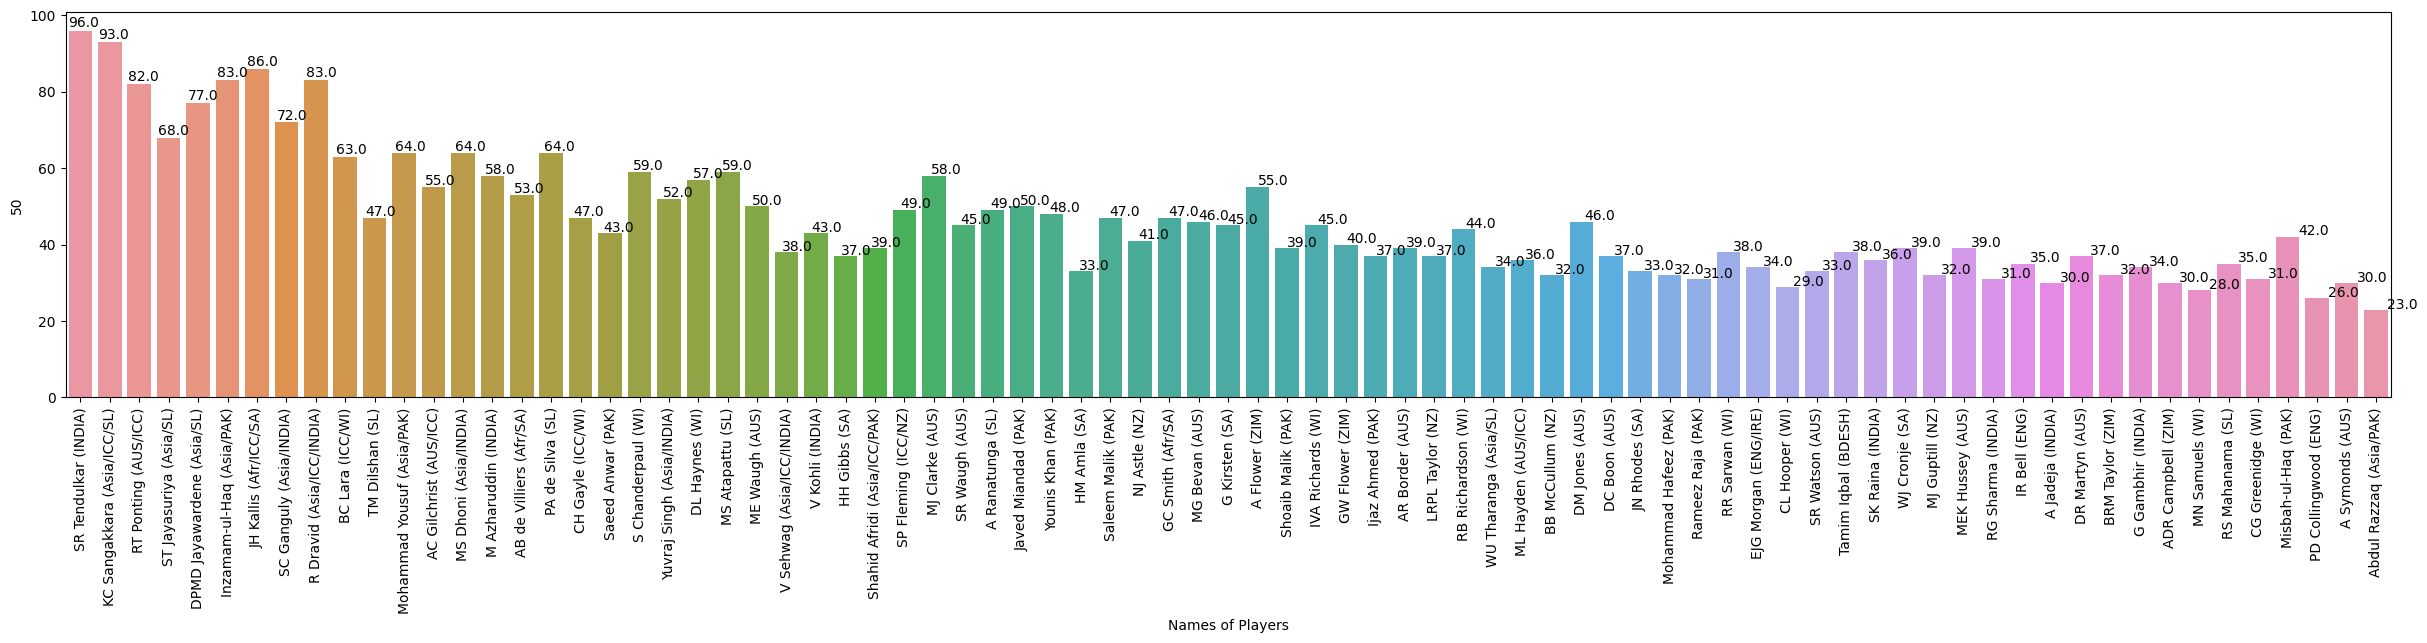

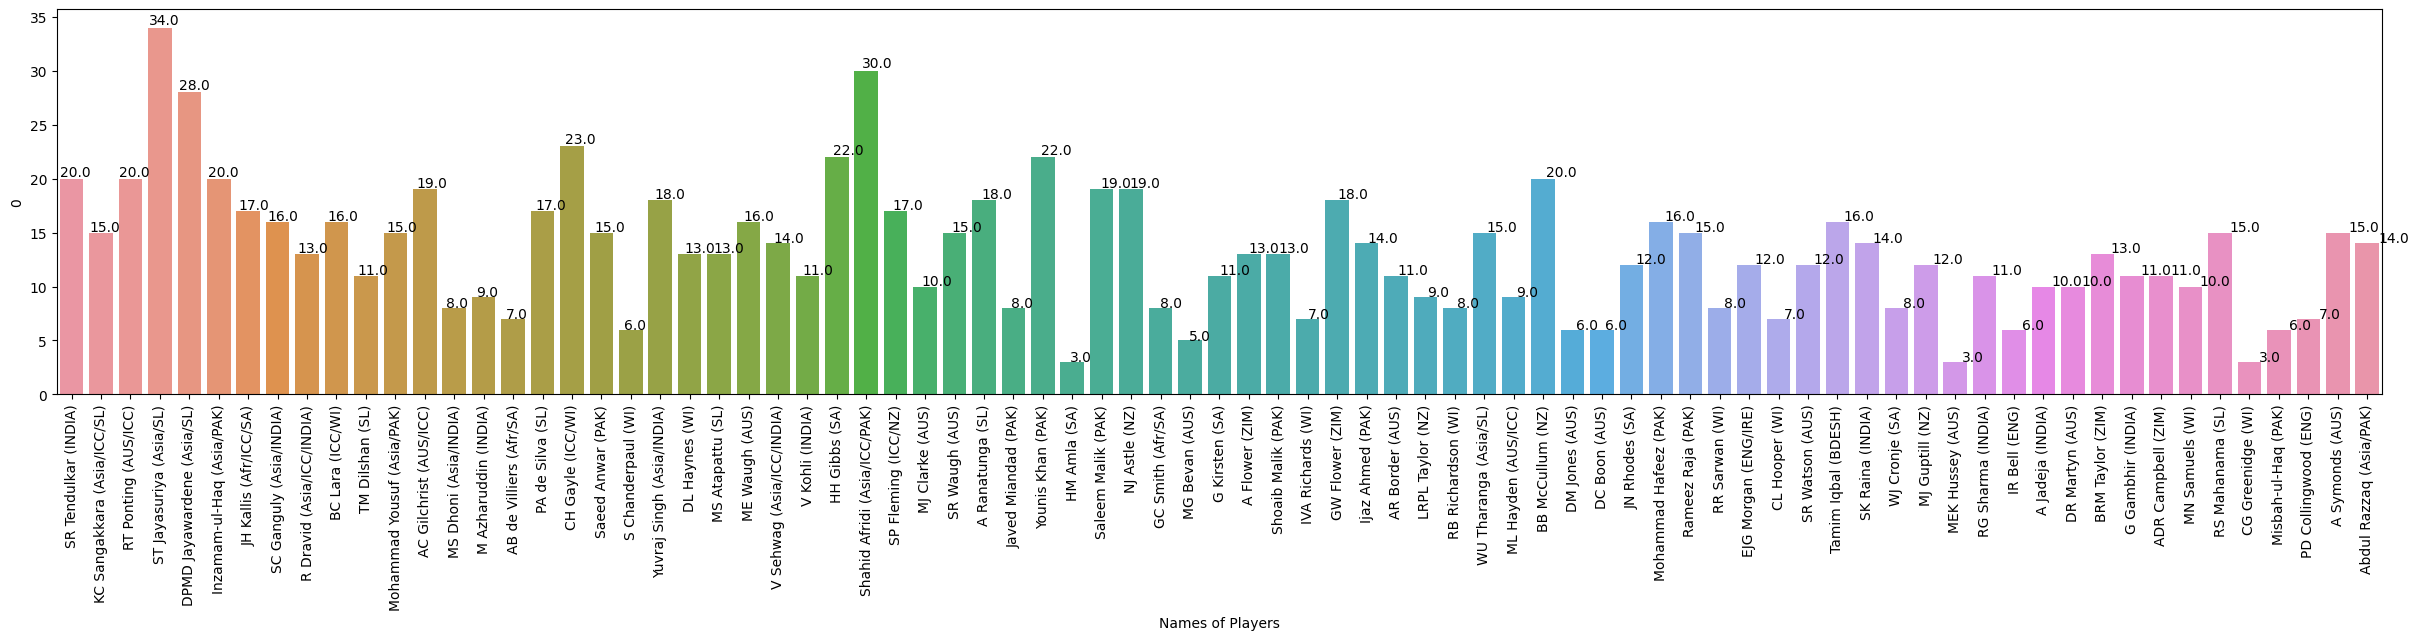

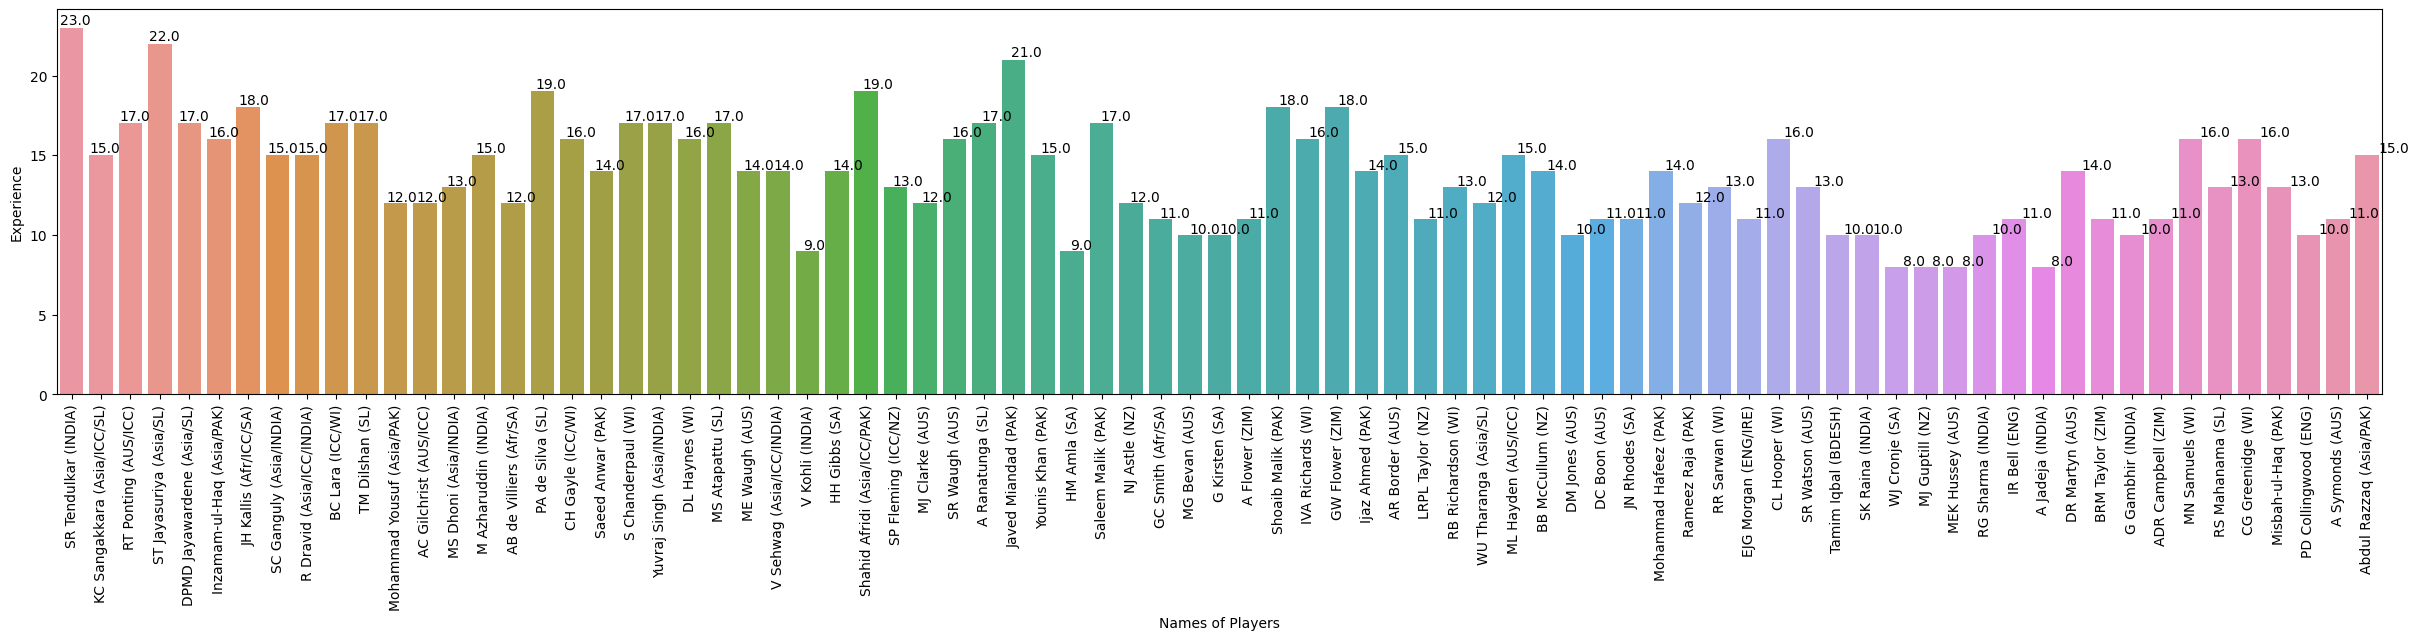

In [75]:
for col_name in col_List:
  if(df[col_name].dtypes=='int64' or df[col_name].dtypes == 'float64'):
    plt.figure(figsize = (30, 5))
    newdf = df[['Player', col_name]].sort_values(col_name, ascending = False).head(10)
    ax = sns.barplot(x = 'Player', y = col_name, data = newdf)
    for i in ax.patches:
      ax.annotate(str(i.get_height()), (i.get_x()*1.01, i.get_height()*1.01))
    ax.set(xlabel = "Names of Players", ylabel = col_name)
    plt.xticks(rotation = 90)
    plt.show()

Doing the same thing for the top 10 players

Getting top 10 players according to Mat played


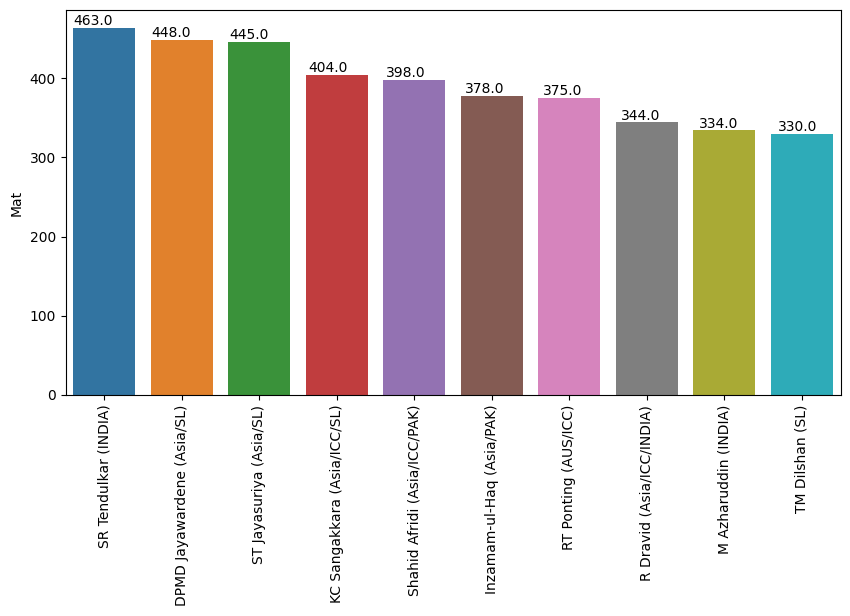

Getting top 10 players according to Inns played


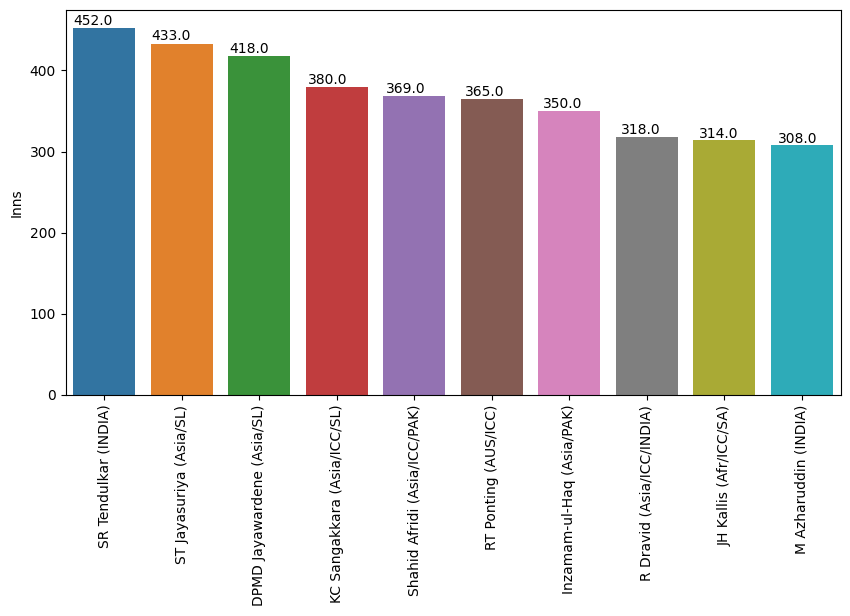

Getting top 10 players according to NO played


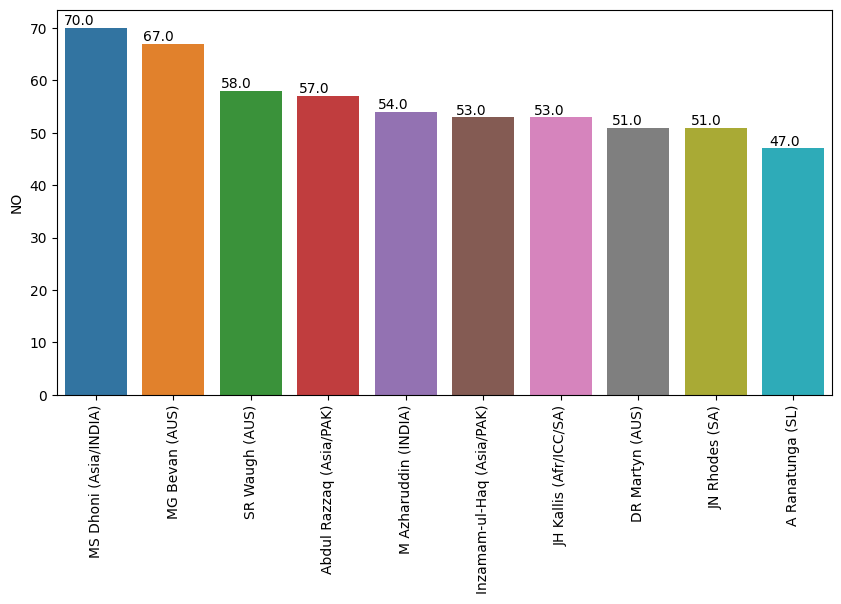

Getting top 10 players according to Runs played


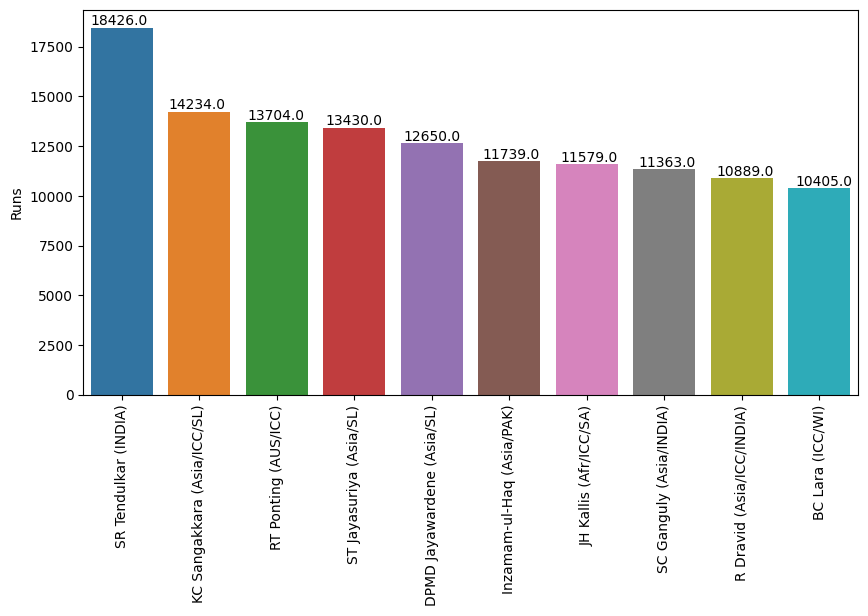

Getting top 10 players according to HS played


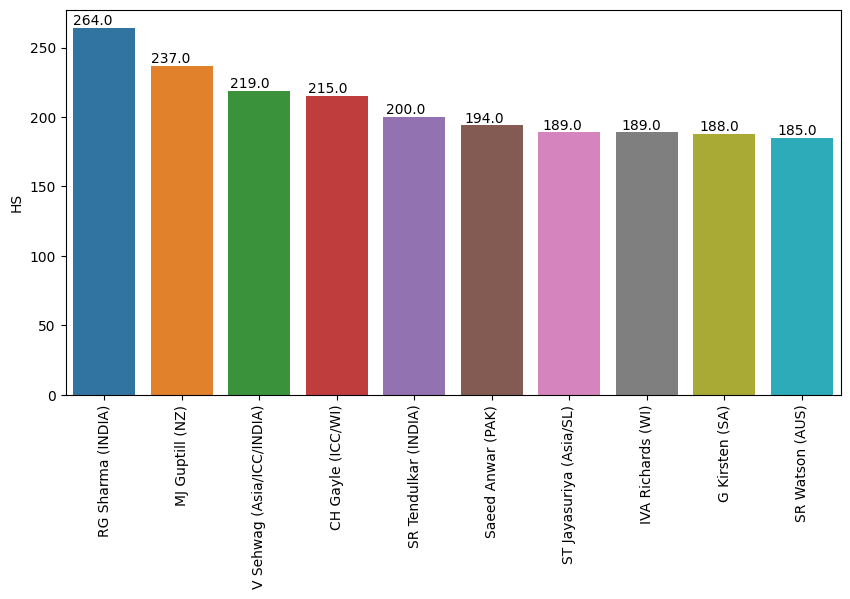

Getting top 10 players according to Ave played


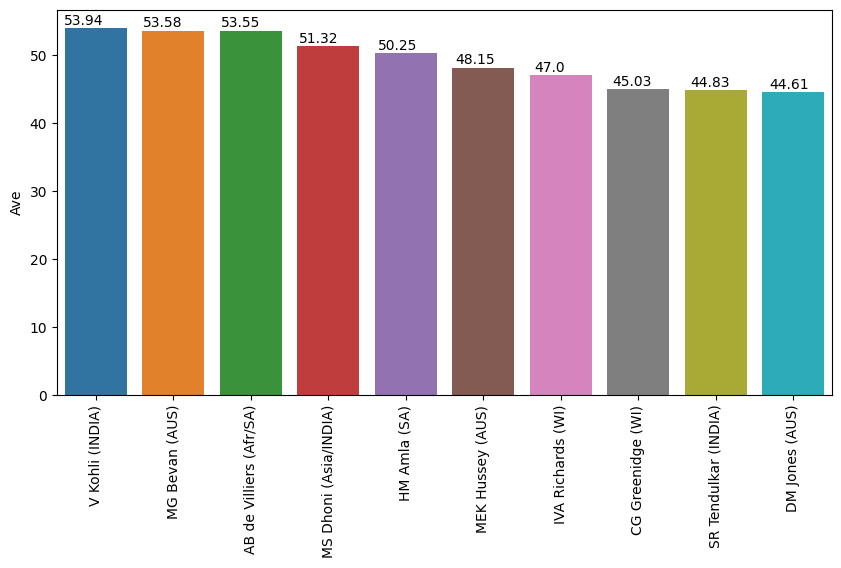

Getting top 10 players according to BF played


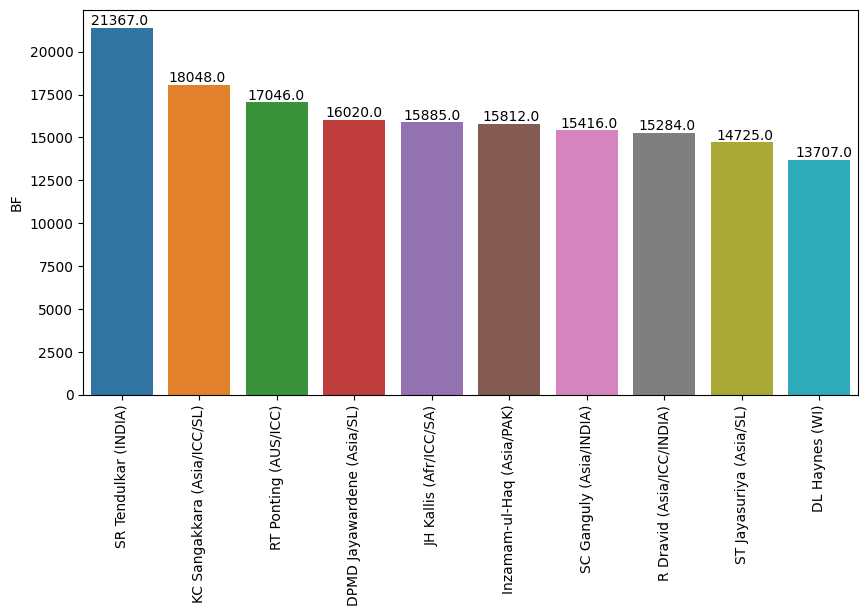

Getting top 10 players according to SR played


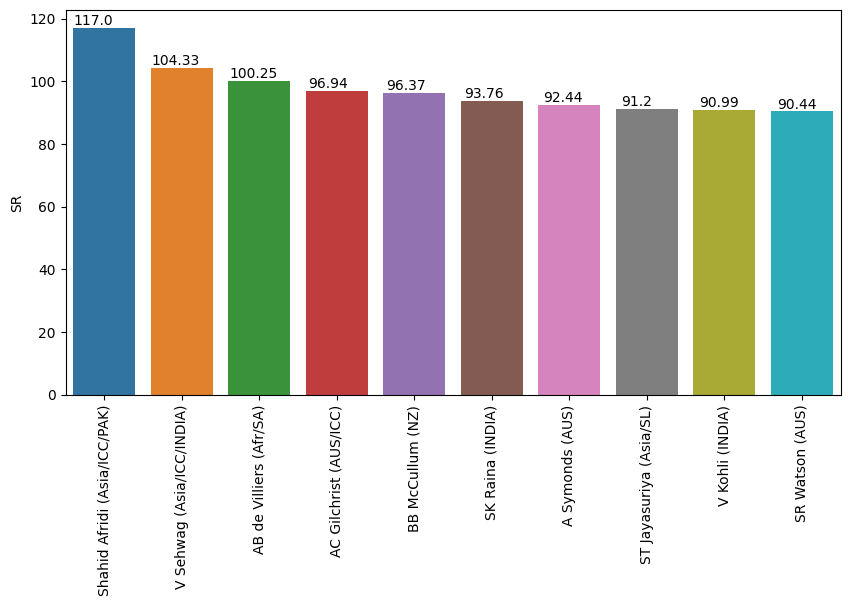

Getting top 10 players according to 100 played


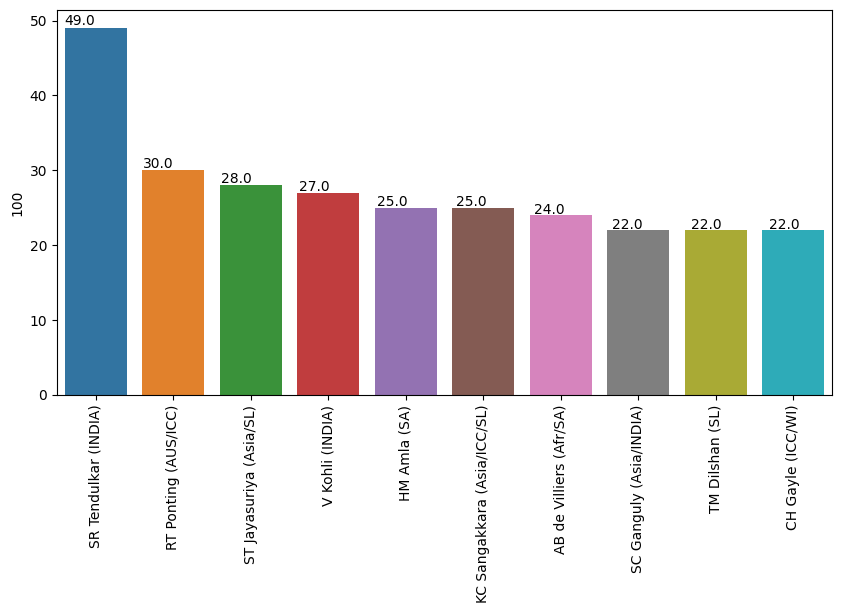

Getting top 10 players according to 50 played


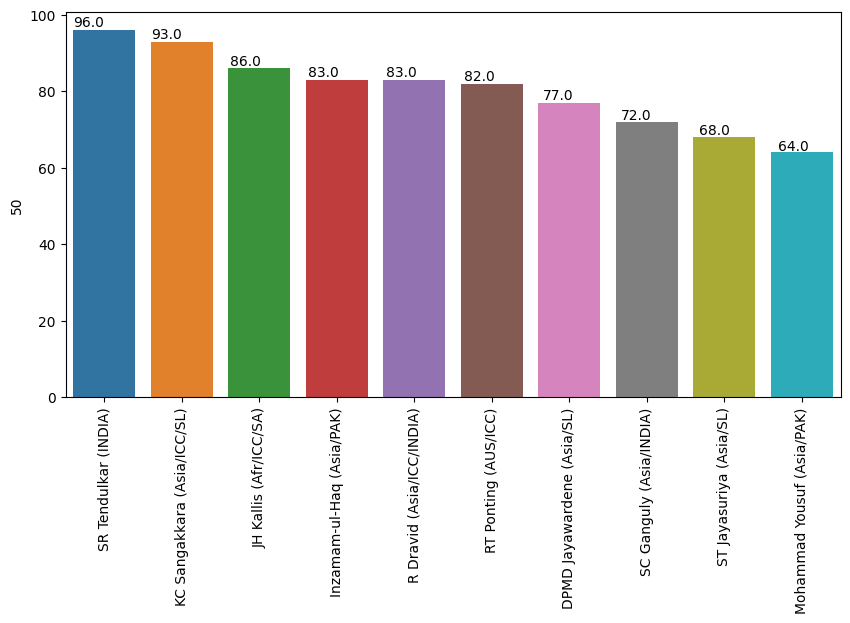

Getting top 10 players according to 0 played


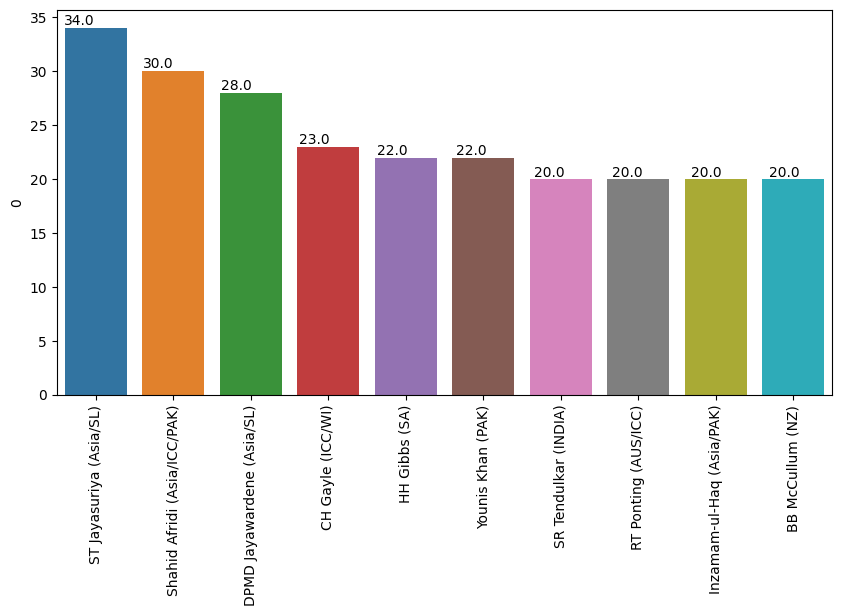

Getting top 10 players according to Experience played


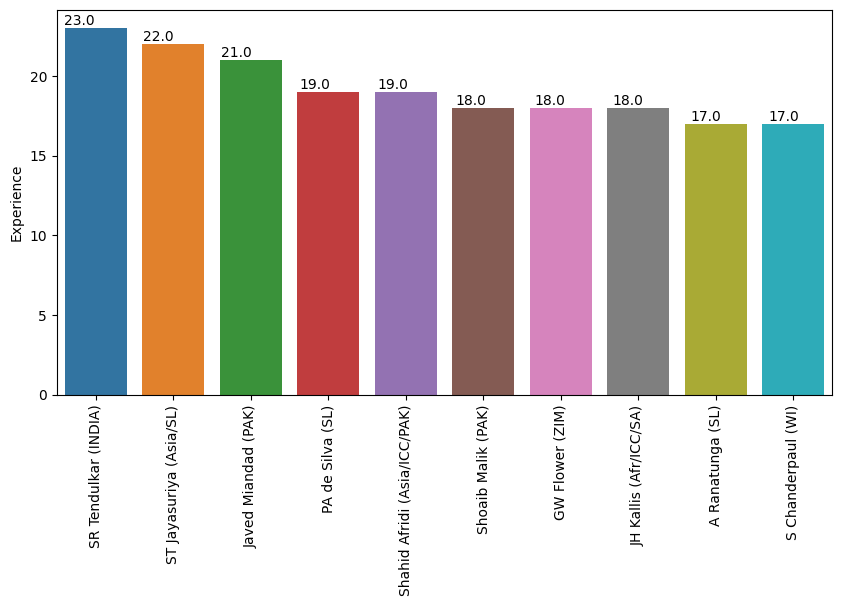

In [79]:
for col_name in col_List:
    if(df[col_name].dtypes=='int64' or df[col_name].dtypes=='float64'):
        plt.figure(figsize = (10,5))
        print("Getting top 10 players according to {col_name} played".format(col_name = col_name))
        bf_top10 = df[['Player',col_name]].sort_values(col_name, ascending = False).head(10)
        ax = sns.barplot(x='Player', y=col_name, data= bf_top10)
        for p in ax.patches:
           ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
        ax.set(xlabel = '', ylabel= col_name)
        plt.xticks(rotation=90)
        plt.show()

<hr>

**Step 7: Correlation**

<hr>

In [81]:
df.corr()*100

<ipython-input-81-dcd83cd45f34>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()*100


Mat        Inns          NO        Runs          HS  \
Mat         100.000000   99.066102   43.399205   86.450012    8.975712   
Inns         99.066102  100.000000   33.878799   89.627047   13.751827   
NO           43.399205   33.878799  100.000000   26.052581  -31.256094   
Runs         86.450012   89.627047   26.052581  100.000000   33.504909   
HS            8.975712   13.751827  -31.256094   33.504909  100.000000   
Ave         -20.447306  -21.077633   24.197143   17.233104   25.006847   
BF           79.857618   83.820552   27.528288   93.673555   19.200568   
SR           18.369378   15.289077   -1.929132   14.640092   38.853963   
100          46.657378   53.022511  -12.157674   77.624284   56.885558   
50           77.788430   80.038094   35.053272   91.443641   18.064606   
0            67.392404   69.787751  -10.197653   49.713941   22.239861   
Experience   68.777400   69.869851   23.381220   58.968823    5.174765   

                   Ave          BF          SR         100          50  \
Mat         -20.447306   79.857618   18.369378   46.657378   77.788430   
Inns        -21.077633   83.820552   15.289077   53.022511   80.038094   
NO           24.197143   27.528288   -1.929132  -12.157674   35.053272   
Runs         17.233104   93.673555   14.640092   77.624284   91.443641   
HS           25.006847   19.200568   38.853963   56.885558   18.064606   
Ave         100.000000   13.208867    9.857362   34.549963   24.035336   
BF           13.208867  100.000000  -19.683452   65.898050   93.332760   
SR            9.857362  -19.683452  100.000000   25.761728   -4.707190   
100          34.549963   65.898050   25.761728  100.000000   55.736918   
50           24.035336   93.332760   -4.707190   55.736918  100.000000   
0           -53.660171   40.252412   27.129067   33.898200   35.712812   
Experience  -23.880982   58.400615    0.020145   33.888142   50.534603   

                     0  Experience  
Mat          67.392404   68.777400  
Inns         69.787751   69.869851  
NO          -10.197653   23.381220  
Runs         49.713941   58.968823  
HS           22.239861    5.174765  
Ave         -53.660171  -23.880982  
BF           40.252412   58.400615  
SR           27.129067    0.020145  
100          33.898200   33.888142  
50           35.712812   50.534603  
0           100.000000   50.388572  
Experience   50.388572  100.000000

<ipython-input-84-9f879e72b052>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  help(sns.heatmap(df.corr()))


Help on Axes in module matplotlib.axes._axes object:

class Axes(matplotlib.axes._base._AxesBase)
 |  Axes(fig, *args, facecolor=None, frameon=True, sharex=None, sharey=None, label='', xscale=None, yscale=None, box_aspect=None, **kwargs)
 |  
 |  An Axes object encapsulates all the elements of an individual (sub-)plot in
 |  a figure.
 |  
 |  It contains most of the (sub-)plot elements: `~.axis.Axis`,
 |  `~.axis.Tick`, `~.lines.Line2D`, `~.text.Text`, `~.patches.Polygon`, etc.,
 |  and sets the coordinate system.
 |  
 |  Like all visible elements in a figure, Axes is an `.Artist` subclass.
 |  
 |  The `Axes` instance supports callbacks through a callbacks attribute which
 |  is a `~.cbook.CallbackRegistry` instance.  The events you can connect to
 |  are 'xlim_changed' and 'ylim_changed' and the callback will be called with
 |  func(*ax*) where *ax* is the `Axes` instance.
 |  
 |  .. note::
 |  
 |      As a user, you do not instantiate Axes directly, but use Axes creation
 |     

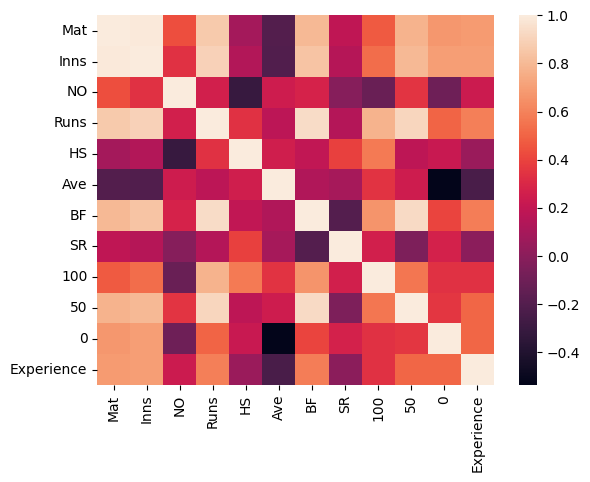

In [84]:
help(sns.heatmap(df.corr()))

<ipython-input-89-408e515cfd26>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr()*100, annot = True, cmap = 'Oranges')


<Axes: >

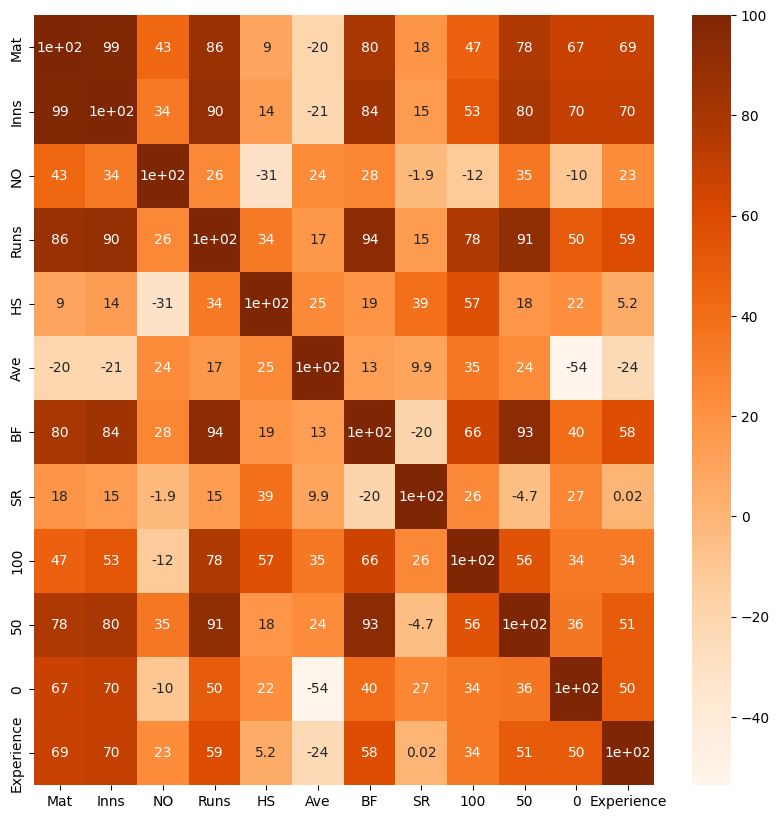

In [89]:
plt.figure(figsize = (10, 10))
sns.heatmap(df.corr()*100, annot = True, cmap = 'Oranges')

Insights:

1. Mat and Inns are highly correlated with coefficient = 0.99

2. Mat and Runs are highly correlated with coefficient of = 0.86

In [85]:
# these are the options for colors
# from matplotlib import colormaps
# list(colormaps)

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'magma_r',
 'inferno_r',
 'plasma_r',
 'viridis_r',
 'cividis_r',
 'twilight_r',
 'twilight

Outliers Detection

In [93]:
df.describe().T

count         mean          std      min       25%      50%  \
Mat          79.0   245.075949    74.211716   128.00   188.000   232.00   
Inns         79.0   230.544304    70.321022   127.00   177.000   217.00   
NO           79.0    30.037975    14.421710     4.00    17.500    29.00   
Runs         79.0  7618.139241  2551.873313  5080.00  5759.000  6798.00   
HS           79.0   149.253165    31.285070    96.00   125.500   144.00   
Ave          79.0    38.523291     5.919093    23.57    34.600    37.87   
BF           79.0  9684.455696  3193.835825  5504.00  7393.500  9134.00   
SR           79.0    79.295316     9.925307    60.57    73.725    77.73   
100          79.0    11.556962     8.092014     0.00     6.000    10.00   
50           79.0    46.443038    16.351701    23.00    34.500    42.00   
0            79.0    13.253165     5.925755     3.00     9.000    13.00   
Experience   79.0    13.746835     3.310699     8.00    11.000    14.00   

                  75%       max  
Mat           281.500    463.00  
Inns          261.500    452.00  
NO             40.000     70.00  
Runs         8739.500  18426.00  
HS            167.500    264.00  
Ave            41.845     53.94  
BF          10976.000  21367.00  
SR             85.180    117.00  
100            15.500     49.00  
50             54.000     96.00  
0              16.000     34.00  
Experience     16.000     23.00

<Axes: >

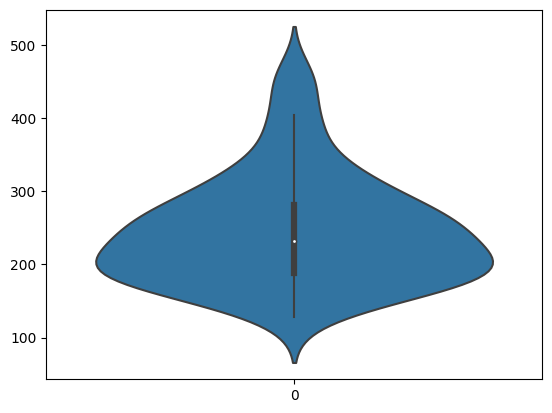

In [94]:
sns.violinplot(df['Mat'])

TASK: you have to make the violinplot for each columns and then if any outliers is detected, eliminate it

<hr>

**Step 8: Data Modelling and Model Making**

<hr>

In [95]:
# drop  the players col as final dataframe should only have numeric
df_drop = df.copy()
player = df_drop.pop('Player')

In [96]:
df_drop.head()

Mat  Inns  NO   Runs   HS    Ave     BF     SR  100  50   0  Experience
0  463   452  41  18426  200  44.83  21367  86.23   49  96  20          23
1  404   380  41  14234  169  41.98  18048  78.86   25  93  15          15
2  375   365  39  13704  164  42.03  17046  80.39   30  82  20          17
3  445   433  18  13430  189  32.36  14725  91.20   28  68  34          22
4  448   418  39  12650  144  33.37  16020  78.96   19  77  28          17

**Scaling The data**

In [97]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df_scaled = sc.fit_transform(df_drop)

In [98]:
df_scaled

array([[ 2.95528204e+00,  3.16933340e+00,  7.64962749e-01,
         4.26232808e+00,  1.63244320e+00,  1.07229395e+00,
         3.68121424e+00,  7.03151526e-01,  4.65672622e+00,
         3.05005720e+00,  1.14583653e+00,  2.81278702e+00],
       [ 2.15517925e+00,  2.13891509e+00,  7.64962749e-01,
         2.60911662e+00,  6.35223595e-01,  5.87724608e-01,
         2.63538469e+00, -4.41394951e-02,  1.67188751e+00,
         2.86541772e+00,  2.96670622e-01,  3.80938324e-01],
       [ 1.76190839e+00,  1.92424461e+00,  6.25396797e-01,
         2.40009894e+00,  4.74381724e-01,  5.96225824e-01,
         2.31965067e+00,  1.10996904e-01,  2.29372891e+00,
         2.18840630e+00,  1.14583653e+00,  9.88900497e-01],
       [ 2.71118288e+00,  2.89741746e+00, -8.40045698e-01,
         2.29204075e+00,  1.27859108e+00, -1.04790945e+00,
         1.58829472e+00,  1.20709133e+00,  2.04499235e+00,
         1.32675540e+00,  3.52350108e+00,  2.50880593e+00],
       [ 2.75186607e+00,  2.68274698e+00,  6.2539679

In [99]:
scaled_df = pd.DataFrame(df_scaled, columns = [ 'Mat', 'Inns', 'NO', 'Runs', 'HS', 'Ave', 'BF', 'SR', '100',
                                            '50', '0', 'Exp'])

In [100]:
scaled_df.head()

Mat      Inns        NO      Runs        HS       Ave        BF  \
0  2.955282  3.169333  0.764963  4.262328  1.632443  1.072294  3.681214   
1  2.155179  2.138915  0.764963  2.609117  0.635224  0.587725  2.635385   
2  1.761908  1.924245  0.625397  2.400099  0.474382  0.596226  2.319651   
3  2.711183  2.897417 -0.840046  2.292041  1.278591 -1.047909  1.588295   
4  2.751866  2.682747  0.625397  1.984430 -0.168986 -0.876185  1.996354   

         SR       100        50         0       Exp  
0  0.703152  4.656726  3.050057  1.145837  2.812787  
1 -0.044139  1.671888  2.865418  0.296671  0.380938  
2  0.110997  2.293729  2.188406  1.145837  0.988900  
3  1.207091  2.044992  1.326755  3.523501  2.508806  
4 -0.034000  0.925678  1.880674  2.504502  0.988900

In [102]:
df_drop.head()

Mat  Inns  NO   Runs   HS    Ave     BF     SR  100  50   0  Experience
0  463   452  41  18426  200  44.83  21367  86.23   49  96  20          23
1  404   380  41  14234  169  41.98  18048  78.86   25  93  15          15
2  375   365  39  13704  164  42.03  17046  80.39   30  82  20          17
3  445   433  18  13430  189  32.36  14725  91.20   28  68  34          22
4  448   418  39  12650  144  33.37  16020  78.96   19  77  28          17

<hr>

**Step 10: KMeans**

<hr>

In [103]:
from sklearn.cluster import KMeans

In [104]:
# elbow curve for finding the optimal number of clusters
clusters = list(range(2, 8))
ssd = []
for num_clusters in clusters:
  model_clus = KMeans(n_clusters = num_clusters, max_iter = 150, random_state = 50)
  model_clus.fit(scaled_df)
  ssd.append(model_clus.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

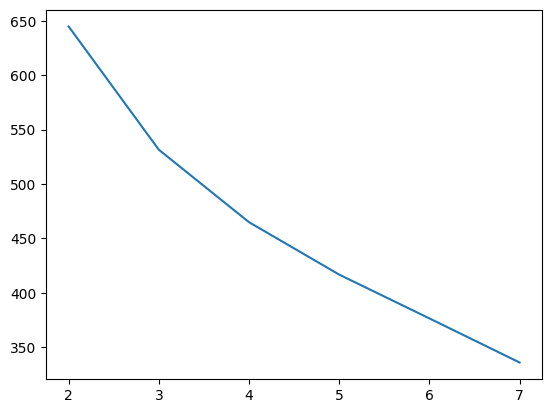

In [105]:
plt.plot(clusters, ssd)

Silhouette Analysis

silhouette score=(p−q)/max(p,q)

p is the mean distance to the points in the nearest cluster that the data point is not a part of

q is the mean intra-cluster distance to all the points in its own cluster.

The value of the silhouette score range lies between -1 to 1.

A score closer to 1 indicates that the data point is very similar to other data points in the cluster,

A score closer to -1 indicates that the data point is not similar to the data points in its cluster

In [108]:
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

In [109]:
# this method is used for finding the optimal number of clusters precisely
range_Clus = [2, 3, 4, 5, 6, 7, 8]
for x in range_Clus:
  kmeans = KMeans(n_clusters=x, max_iter=50, random_state = 100)
  kmeans.fit(scaled_df)

  cluster_labels = kmeans.labels_
  # silhouette score
  sil_avg = silhouette_score(scaled_df, cluster_labels)
  print(f'For n_clusters: {x}, the silhouette score is {sil_avg}')

For n_clusters: 2, the silhouette score is 0.3136820966012298
For n_clusters: 3, the silhouette score is 0.21336526403477102
For n_clusters: 4, the silhouette score is 0.2023087916212694
For n_clusters: 5, the silhouette score is 0.18461975339705558
For n_clusters: 6, the silhouette score is 0.18381917434498504
For n_clusters: 7, the silhouette score is 0.1942987796124123
For n_clusters: 8, the silhouette score is 0.17340101689594006


Since the values for n = 3 is less than the value of n=4, so we are going ahead with 4

In [110]:
clusters = KMeans(n_clusters =4, max_iter = 150, random_state=15)
clusters.fit(scaled_df)

KMeans(max_iter=150, n_clusters=4, random_state=15)

In [112]:
clusters.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2,
       2, 2, 3, 3, 2, 2, 2, 0, 2, 2, 2, 2, 3, 2, 2, 0, 0, 3, 0, 2, 3, 2,
       2, 2, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 3,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [113]:
# assigning the labels to df
df['Cluster Assigned'] = clusters.labels_
df.head()

Player  Mat  Inns  NO   Runs   HS    Ave     BF  \
0         SR Tendulkar (INDIA)  463   452  41  18426  200  44.83  21367   
1  KC Sangakkara (Asia/ICC/SL)  404   380  41  14234  169  41.98  18048   
2         RT Ponting (AUS/ICC)  375   365  39  13704  164  42.03  17046   
3      ST Jayasuriya (Asia/SL)  445   433  18  13430  189  32.36  14725   
4   DPMD Jayawardene (Asia/SL)  448   418  39  12650  144  33.37  16020   

      SR  100  50   0  Experience  Cluster Assigned  
0  86.23   49  96  20          23                 1  
1  78.86   25  93  15          15                 1  
2  80.39   30  82  20          17                 1  
3  91.20   28  68  34          22                 1  
4  78.96   19  77  28          17                 1

In [114]:
# how many data point in a cluster
df['Cluster Assigned'].value_counts()

0    32
2    27
3    11
1     9
Name: Cluster Assigned, dtype: int64

It seems there are good number of countries in each clusters.

From the business understanding we have learnt that Ave, NO, SR are some important factors which decides the form of a player. Hence, we will proceed with analyzing these 3 components to build some meaningful clusters.

In [116]:
df[['NO','Ave','SR','Cluster Assigned']].groupby('Cluster Assigned').mean()

NO        Ave         SR
Cluster Assigned                                 
0                 28.281250  38.022188  76.257812
1                 38.555556  39.847778  78.634444
2                 31.074074  35.771852  79.227037
3                 25.636364  45.650909  88.840000

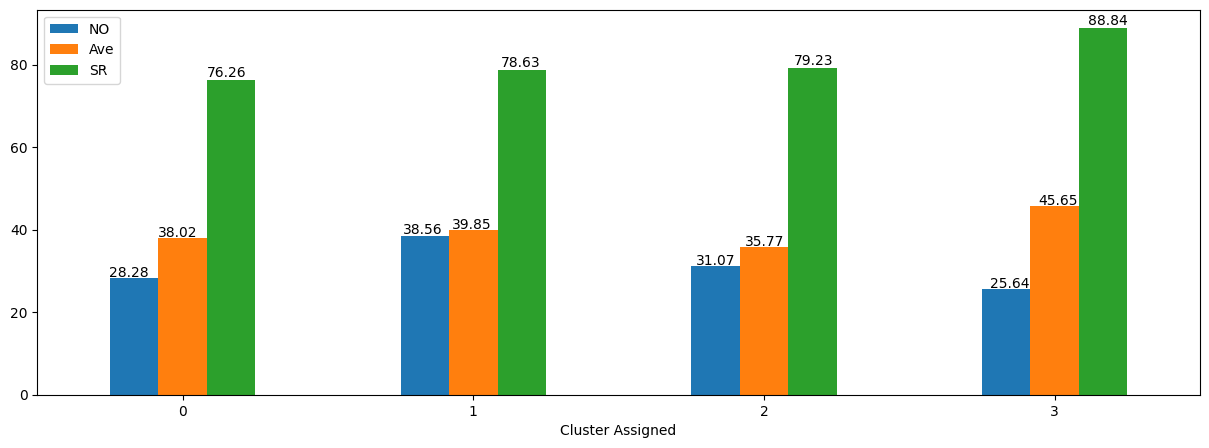

In [117]:
ax=df[['NO','Ave','SR','Cluster Assigned']].groupby('Cluster Assigned').mean().plot(kind = 'bar',figsize = (15,5))

for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation=0)
plt.show();

In [118]:

df[df['Cluster Assigned']==2].sort_values(by = ['NO','Ave','SR'], ascending = [True,False,False]).head()  #2459.37
#Can be Batsman Coach


Player  Mat  Inns  NO  Runs   HS    Ave     BF     SR  \
12  AC Gilchrist (AUS/ICC)  287   279  11  9619  172  35.89   9922  96.94   
36           NJ Astle (NZ)  223   217  14  7090  145  34.92   9760  72.64   
26           HH Gibbs (SA)  248   240  16  8094  175  36.13   9721  83.26   
17       CH Gayle (ICC/WI)  269   264  17  9221  215  37.33  10834  85.11   
43         GW Flower (ZIM)  221   214  18  6571  142  33.52   9723  67.58   

    100  50   0  Experience  Cluster Assigned  
12   16  55  19          12                 2  
36   16  41  19          12                 2  
26   21  37  22          14                 2  
17   22  47  23          16                 2  
43    6  40  18          18                 2

In [119]:

df[df['Cluster Assigned']==1].sort_values(by = ['NO','Ave','SR'], ascending = [True,False,False]).head() #1710.4



Player  Mat  Inns  NO   Runs   HS    Ave     BF     SR  \
3     ST Jayasuriya (Asia/SL)  445   433  18  13430  189  32.36  14725  91.20   
7     SC Ganguly (Asia/INDIA)  311   300  23  11363  183  41.02  15416  73.70   
2        RT Ponting (AUS/ICC)  375   365  39  13704  164  42.03  17046  80.39   
4  DPMD Jayawardene (Asia/SL)  448   418  39  12650  144  33.37  16020  78.96   
8   R Dravid (Asia/ICC/INDIA)  344   318  40  10889  153  39.16  15284  71.24   

   100  50   0  Experience  Cluster Assigned  
3   28  68  34          22                 1  
7   22  72  16          15                 1  
2   30  82  20          17                 1  
4   19  77  28          17                 1  
8   12  83  13          15                 1

In [120]:
df[df['Cluster Assigned']==3].sort_values(by = ['NO','Ave','SR'], ascending = [True,False,False]).head() #1428.86


Player  Mat  Inns  NO  Runs   HS    Ave    BF      SR  \
24  V Sehwag (Asia/ICC/INDIA)  251   245   9  8273  219  35.05  7929  104.33   
34               HM Amla (SA)  156   153  10  7186  159  50.25  8069   89.05   
49        ML Hayden (AUS/ICC)  161   155  15  6133  181  43.80  7767   78.96   
63            MJ Guptill (NZ)  146   143  16  5500  237  43.30  6269   87.73   
39             G Kirsten (SA)  185   185  19  6798  188  40.95  9436   72.04   

    100  50   0  Experience  Cluster Assigned  
24   15  38  14          14                 3  
34   25  33   3           9                 3  
49   10  36   9          15                 3  
63   12  32  12           8                 3  
39   13  45  11          10                 3

In [121]:
df[df['Cluster Assigned']==0].sort_values(by = ['NO','Ave','SR'], ascending = [True,False,False]).head() #1147.299


Player  Mat  Inns  NO  Runs   HS    Ave    BF     SR  100  \
60    Tamim Iqbal (BDESH)  173   171   4  5743  154  34.38  7333  78.31    9   
37      GC Smith (Afr/SA)  197   194  10  6989  141  37.98  8648  80.81   10   
70      G Gambhir (INDIA)  147   143  11  5238  150  39.68  6144  85.25   11   
54  Mohammad Hafeez (PAK)  190   190  12  5876  140  33.01  7774  75.58   11   
74      CG Greenidge (WI)  128   127  13  5134  133  45.03  7908  64.92   11   

    50   0  Experience  Cluster Assigned  
60  38  16          10                 0  
37  47   8          11                 0  
70  34  11          10                 0  
54  32  16          14                 0  
74  31   3          16                 0

In [122]:

X = scaled_df.iloc[:, [3, 6]].values
X

array([[ 4.26232808,  3.68121424],
       [ 2.60911662,  2.63538469],
       [ 2.40009894,  2.31965067],
       [ 2.29204075,  1.58829472],
       [ 1.98442984,  1.99635416],
       [ 1.62515607,  1.93081256],
       [ 1.5620564 ,  1.95381514],
       [ 1.47687184,  1.80603146],
       [ 1.28993905,  1.76443775],
       [ 1.09906254,  1.07183957],
       [ 1.05370965,  0.70852488],
       [ 0.82891706,  1.02646463],
       [ 0.78908539,  0.07485112],
       [ 0.74057751,  0.3218925 ],
       [ 0.6940415 ,  0.94044129],
       [ 0.6707735 , -0.12271897],
       [ 0.65697044,  0.55412401],
       [ 0.63212495,  0.36222579],
       [ 0.47555888,  0.39499659],
       [ 0.45741773,  0.85819919],
       [ 0.42705101,  0.07548132],
       [ 0.40614924,  1.26751904],
       [ 0.35921886,  0.9168085 ],
       [ 0.34778204,  0.43123353],
       [ 0.25825938, -0.55315078],
       [ 0.20817401, -0.23079958],
       [ 0.18766662,  0.01151525],
       [ 0.17583543, -0.87991343],
       [ 0.16518736,

In [123]:
y_kmeans = clusters.fit_predict(X)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

<Axes: xlabel='Not outs', ylabel='Average'>

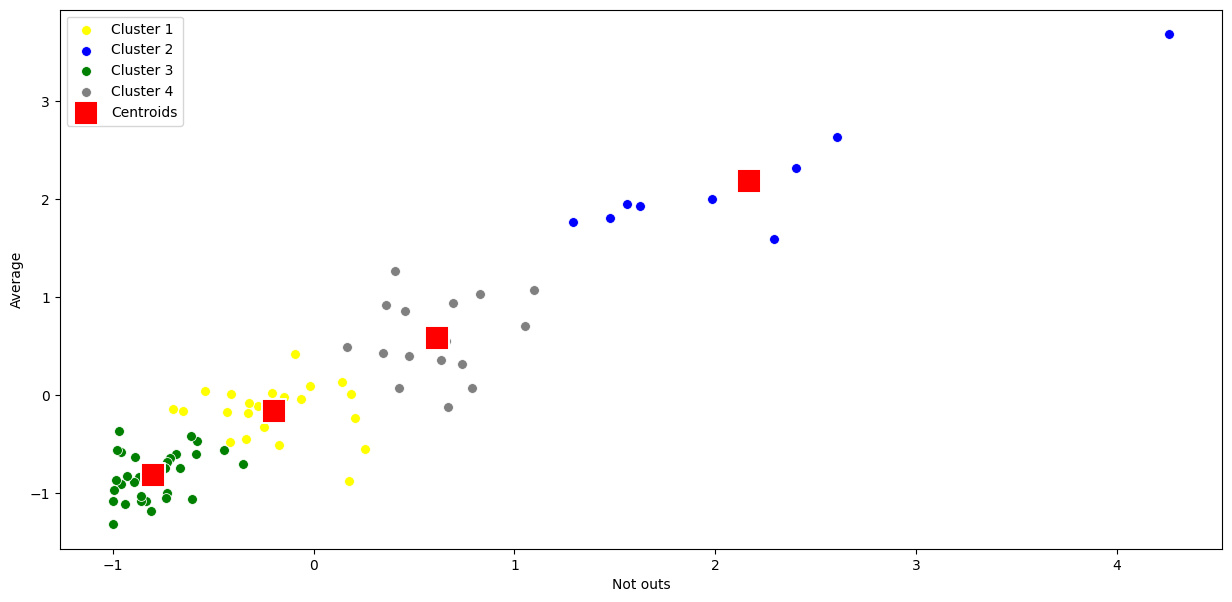

In [124]:
# Visualising the clusters
plt.figure(figsize=(15,7))
sns.scatterplot(x = X[y_kmeans == 0, 0],y =  X[y_kmeans == 0, 1], color = 'yellow',data = X, label = 'Cluster 1',s=50)
sns.scatterplot(x = X[y_kmeans == 1, 0],y = X[y_kmeans == 1, 1], color = 'blue',data = X, label = 'Cluster 2',s=50)
sns.scatterplot(x = X[y_kmeans == 2, 0],y =  X[y_kmeans == 2, 1], color = 'green',data = X, label = 'Cluster 3',s=50)
sns.scatterplot(x = X[y_kmeans == 3, 0],y = X[y_kmeans == 3, 1], color = 'grey',data = X,  label= 'Cluster 4',s=50)
#sns.scatterplot(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], color = 'orange', label = 'Cluster 5',s=50)
plt.xlabel("Not outs")
plt.ylabel("Average")
sns.scatterplot( x = clusters.cluster_centers_[0:4, 0], y =  clusters.cluster_centers_[0:4, 1], color = 'red',
                label = 'Centroids',s=300,marker=',')

X[y_kmeans == 0, 0] and X[y_kmeans == 0, 1] extract the first and second columns of the data matrix X respectively, for all data points assigned to cluster 0. These are the values of the two features of the data points in cluster 0.